# Covid-19 Analysis - World and India : Comparision and Prediction 

Importing all the Libraries that we need to do this project work

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imported a dataset of Covid 19 where the data is stored upto 12th August, 2020

In [3]:
df = pd.read_csv('covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

Shape of the dataset

In [4]:
df.shape

(85638, 8)

Information regarding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              85638 non-null  int64  
 1   ObservationDate  85638 non-null  object 
 2   Province/State   57341 non-null  object 
 3   Country/Region   85638 non-null  object 
 4   Last Update      85638 non-null  object 
 5   Confirmed        85638 non-null  float64
 6   Deaths           85638 non-null  float64
 7   Recovered        85638 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.2+ MB


We will convert the ObservationDate and Last Update to datetime since they are currently taken as object

The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same

In [7]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

SNo ObservationDate     Province/State  Country/Region  \
84896  84897      2020-08-12                NaN     Afghanistan   
84897  84898      2020-08-12                NaN         Albania   
84898  84899      2020-08-12                NaN         Algeria   
84899  84900      2020-08-12                NaN         Andorra   
84900  84901      2020-08-12                NaN          Angola   
...      ...             ...                ...             ...   
85633  85634      2020-08-12  Zaporizhia Oblast         Ukraine   
85634  85635      2020-08-12            Zeeland     Netherlands   
85635  85636      2020-08-12           Zhejiang  Mainland China   
85636  85637      2020-08-12    Zhytomyr Oblast         Ukraine   
85637  85638      2020-08-12       Zuid-Holland     Netherlands   

              Last Update  Confirmed  Deaths  Recovered  
84896 2020-08-13 04:29:15      37345    1354      26694  
84897 2020-08-13 04:29:15       6817     208       3552  
84898 2020-08-13 04:29:15      36699    1333      25627  
84899 2020-08-13 04:29:15        977      53        855  
84900 2020-08-13 04:29:15       1762      80        577  
...                   ...        ...     ...        ...  
85633 2020-08-13 04:29:15        971      22        680  
85634 2020-08-13 04:29:15        950      69          0  
85635 2020-08-13 04:29:15       1275       1       1268  
85636 2020-08-13 04:29:15       2215      48       1574  
85637 2020-08-13 04:29:15      15765    1314          0  

[742 rows x 8 columns]

Out of the 85638 records we are now left with only 742 and many of the records don't have the Province defined

These are the provinces that are basically a not part of China

**Whenever provinces are null, we replace them with the country name and group mainland China and China together in China**

In [8]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     168
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [9]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [10]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

We are performing the encoding of the country to CountryID and Province to ProvinceID

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

SNo ObservationDate Province/State Country/Region  \
84896  84897      2020-08-12    Afghanistan    Afghanistan   
84897  84898      2020-08-12        Albania        Albania   
84898  84899      2020-08-12        Algeria        Algeria   
84899  84900      2020-08-12        Andorra        Andorra   
84900  84901      2020-08-12         Angola         Angola   

              Last Update  Confirmed  Deaths  Recovered  ProvinceID  CountryID  
84896 2020-08-13 04:29:15      37345    1354      26694           3          0  
84897 2020-08-13 04:29:15       6817     208       3552          10          1  
84898 2020-08-13 04:29:15      36699    1333      25627          12          2  
84899 2020-08-13 04:29:15        977      53        855          22          3  
84900 2020-08-13 04:29:15       1762      80        577          23          4

## Presenting the Heatmap for all the 'Confirmed','Recovered' and 'Casualties' with respect to the ProvinceID and CountryID

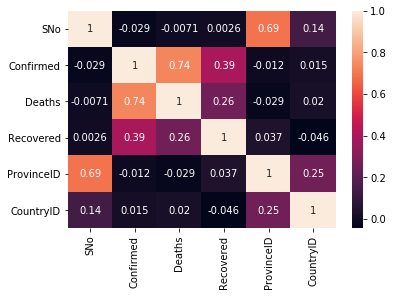

In [12]:
corr = df_update.corr()
sns.heatmap(corr, annot = True)

### Finding out How many countries were affected by Covid-19

In [13]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

Total of 223 countries are affected by this virus, where the epicentre of this virus is Hubei Province of Mainland China 

### Percentage of confirmed cases per country through the Pie-chart

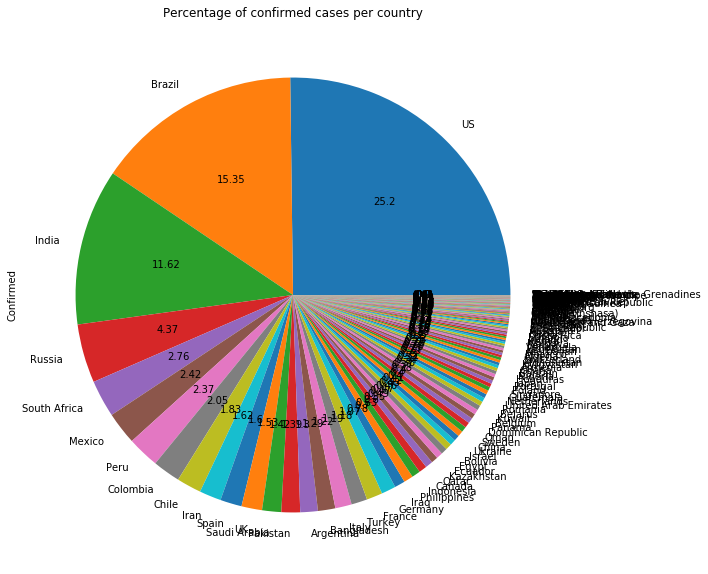

In [14]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

Approximately 25% of the total confirmed cases of the world is found at United States of America

After USA, there are Brazil and India, the 2nd and 3rd most affected countries in the world where the percentage of confirmed cases reported with respect to the world is 15.35% and 12% respectively

## Top 5 countries having most number of confirmed cases till 12th August, 2020

In [149]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

Country/Region  Confirmed  Recovered  Deaths
0             US    5197118    1753760  166026
1         Brazil    3164785    2506228  104201
2          India    2396637    1695982   47033
3         Russia     900745     708900   15231
4   South Africa     568919     432029   11010

**Representing the Top 5 most affected countries with gradient, where darker the colour is values of that particular area is the greatest**

In [150]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

### Plotting the Bar Graph representation where it's showing the Confirmed cases, Recovered cases and Death tolls in the Top 5 affected countries till 12th August, 2020

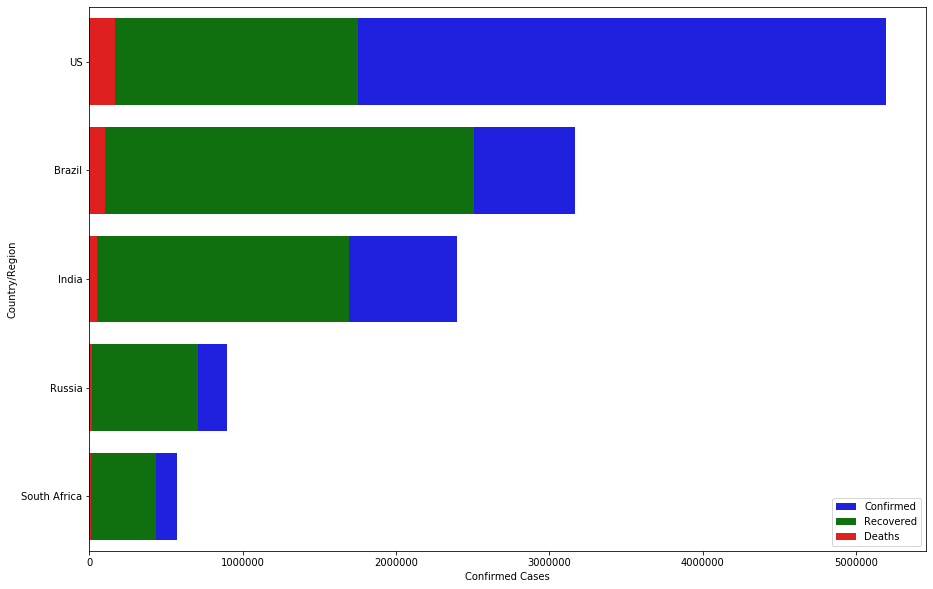

In [17]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

## Recovered Cases v/s Death Cases in the Top 5 countries

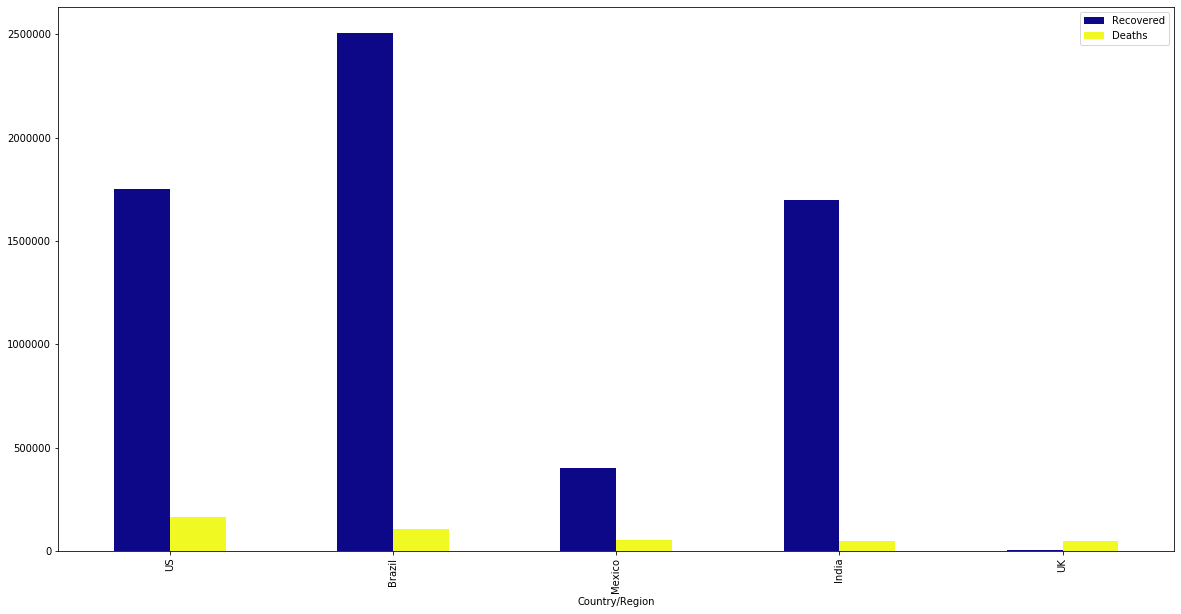

In [18]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

# China - The First Epicentre of the pandemic

### Since China is the first epicentre of this pandemic situation, we are checking for provinces within China to detect the spread out of the virus

In [19]:
china_cases=df_update.loc[df_update['Country/Region']=='China']

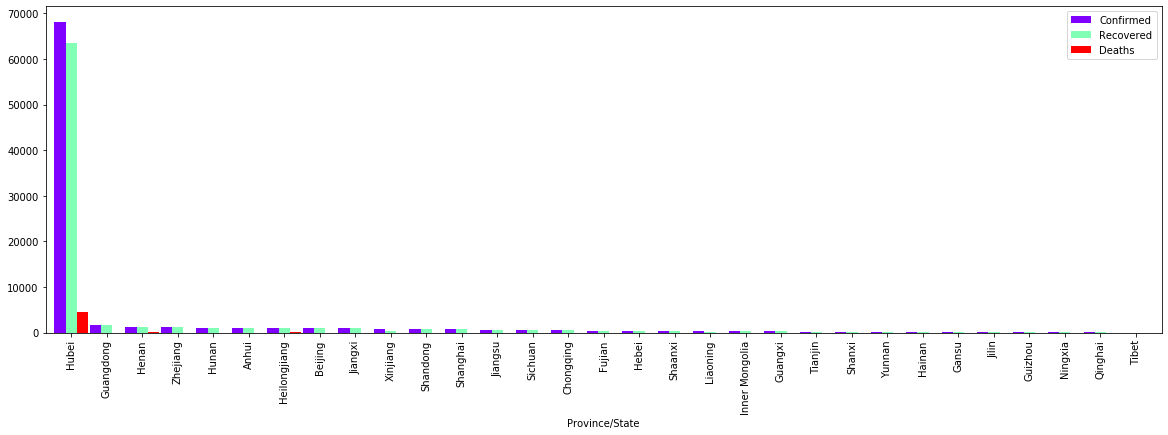

In [20]:
china_province_cases=china_cases[['Confirmed','Recovered','Deaths','Province/State']].groupby('Province/State').sum().sort_values('Confirmed',ascending=False)
china_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(20,6))
plt.show()

The above representation is showing that the most affected are or, Province in China is Hubei where the confirmed cases are reached to 70000 and approximately 90% of the cases of Total China's Confirmed Cases

### The per-day statistics of China where the line graph shows flattening of curve confirmed cases. However on 17th April there was a sudden rise in the Death and Confirmed cases

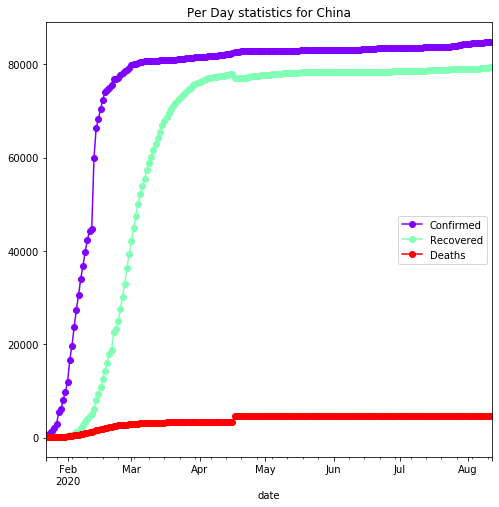

In [21]:
china_cases_complete=df.loc[df['Country/Region']=='China']
china_cases_complete['date'] = china_cases_complete['ObservationDate'].dt.date
china_cases_complete['date']=pd.to_datetime(china_cases_complete['date'])
china_cases_complete = china_cases_complete[china_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = china_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for China',colormap='rainbow',marker='o')
plt.show()

This graph shows how much stiff the growth rate is in the past months of February and March

In [22]:
num_plot_china=num_plot.reset_index()
num_plot_china['Death Case Increase']=0
num_plot_china['Confirmed Case Increase']=0
num_plot_china['Confirmed Case Increase'][0]=0
num_plot_china['Death Case Increase'][0]=0
for i in range(1,num_plot_china.shape[0]):
    num_plot_china['Confirmed Case Increase'][i]=-(num_plot_china.iloc[i-1][1]-num_plot_china.iloc[i][1])
    num_plot_china['Death Case Increase'][i]=-(num_plot_china.iloc[i-1][3]-num_plot_china.iloc[i][3])
num_plot_china.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08      84619      79168    4634                    0   
200 2020-08-09      84668      79232    4634                    0   
201 2020-08-10      84712      79284    4634                    0   
202 2020-08-11      84731      79342    4634                    0   
203 2020-08-12      84756      79398    4634                    0   

     Confirmed Case Increase  
199                       23  
200                       49  
201                       44  
202                       19  
203                       25

From the confirmed cases plot for China we can see that the number of new cases have been declining with a few constant number of cases everyday.17th April shows a sudden increase in the number of confirmed cases. China is again seeing some increase in the number of cases since 13th June

### Total no. of Confirmed cases in China till 12th August, 2020

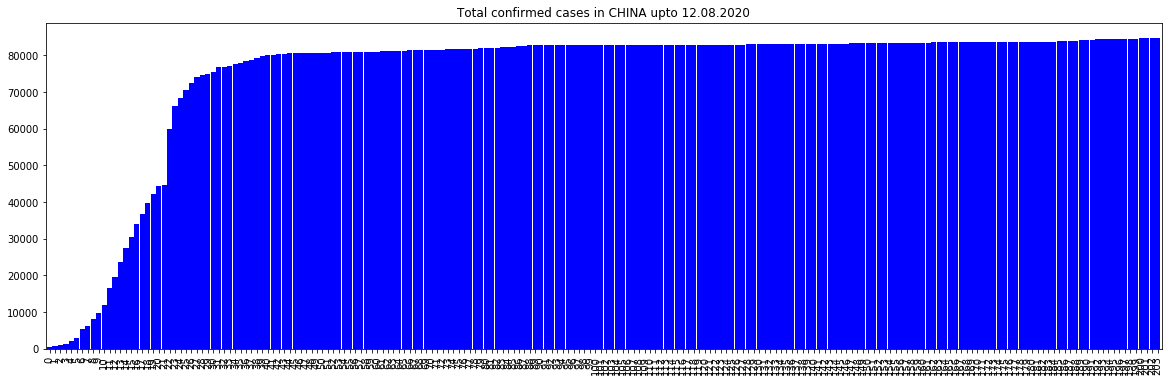

In [23]:
num_plot_china['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total confirmed cases in CHINA upto 12.08.2020',colormap='winter')
plt.show()

**Understanding from the graph : The Total no. of Confirmed cases in China graph shows that the graph is flattened after May, 2020, which shows that the increment in the cases is not exponentially in the recent times as the graph is Flattened**

### Total no. of Recovered cases in China till 12th August, 2020

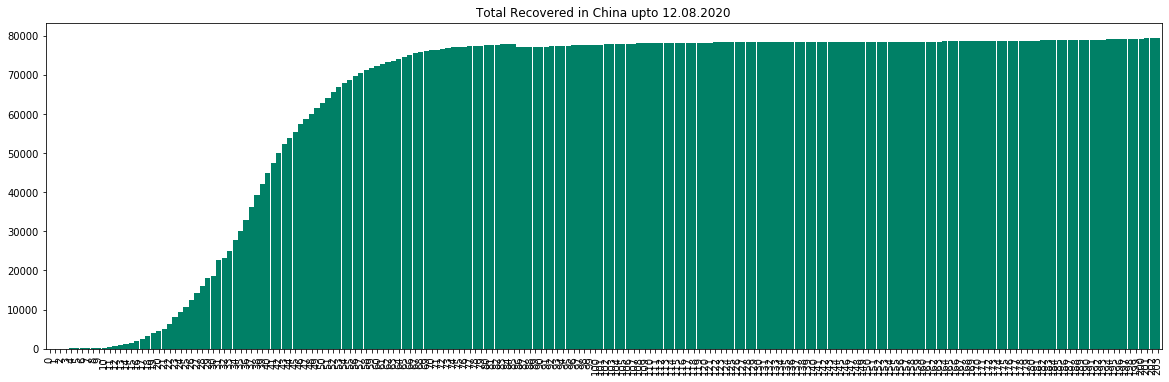

In [24]:
num_plot_china['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Recovered in China upto 12.08.2020',colormap='summer')
plt.show()

### Total no. of Casualties in China till 12th August, 2020

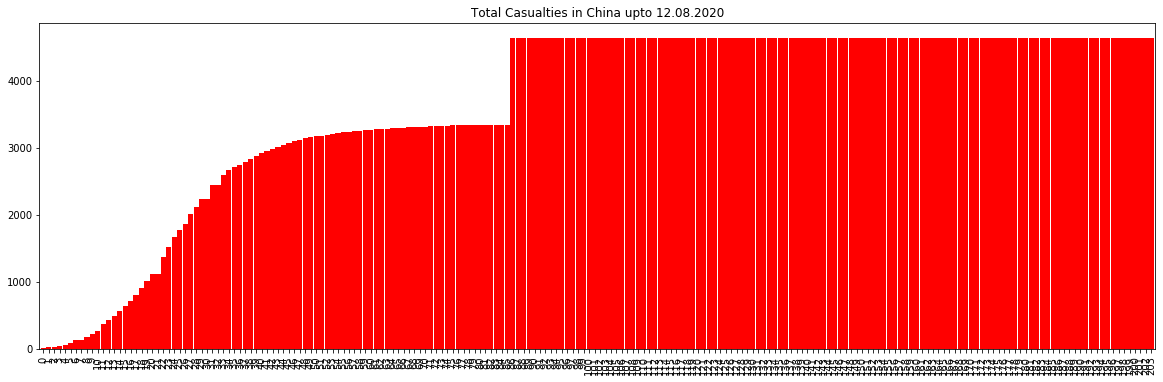

In [25]:
num_plot_china['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Casualties in China upto 12.08.2020',colormap='autumn')
plt.show()

### Confirmed cases increase in China till 12th August, 2020

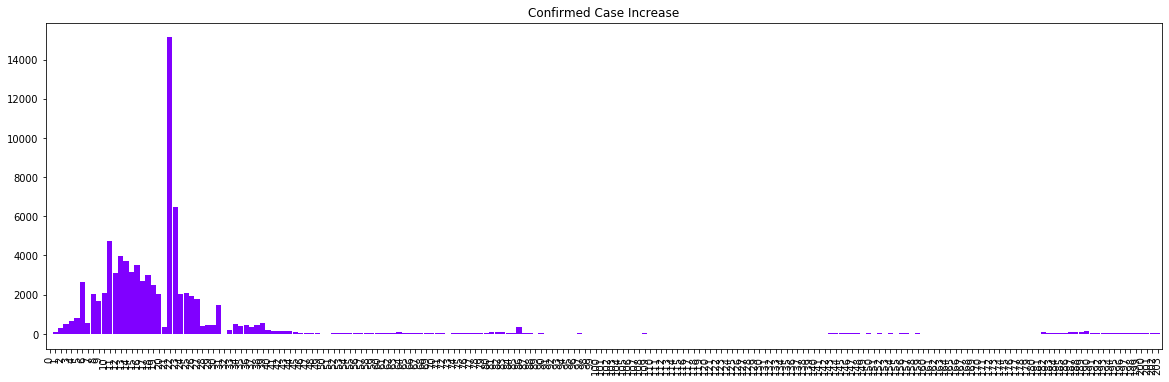

In [26]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='rainbow')
plt.show()

### Death case increase in China till 12th August, 2020

From the Death Increase plot for China we can see that deaths have reduced to a great level but on 17th April there were 1290 deaths reported in a single day. China reported this increase as some miscalculation on their end during the initial phase of COVID

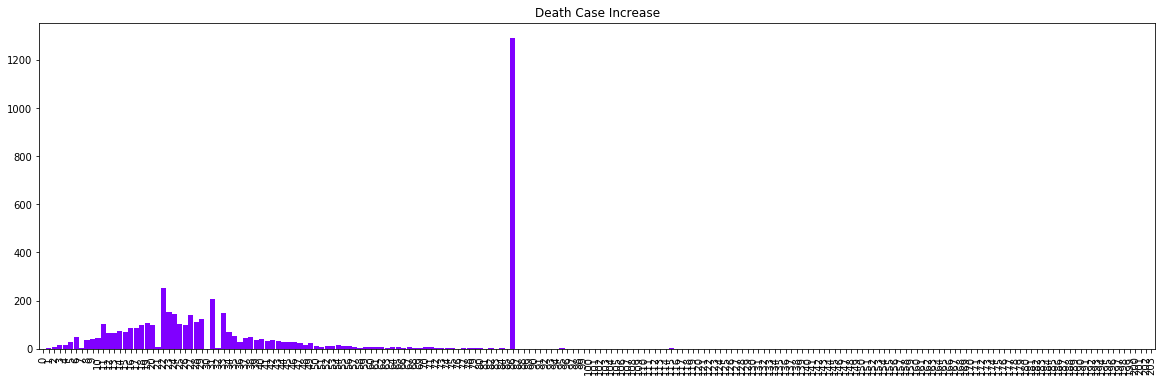

In [27]:
num_plot_china['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='rainbow')
plt.show()

## Per day Statistics for Hubei Province, China [The Major epicentre]

We plot the per day statistics for Hubei since it has the highest rate of confirmed cases in China
If we compare the China and Hubei plots, they both are similar. Hence we can say that the China stats are influenced deeply by a single province

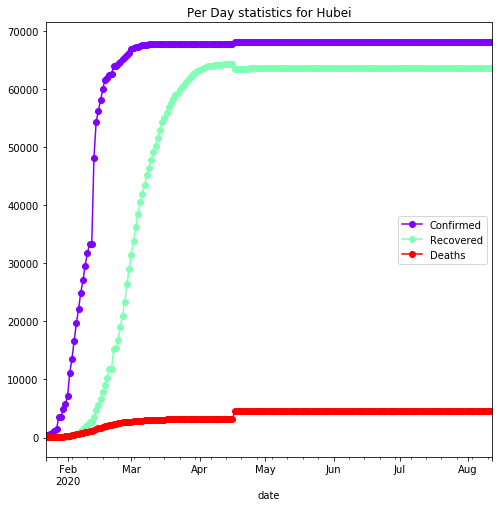

In [28]:
hubei_cases_complete=df.loc[df['Province/State']=='Hubei']
hubei_cases_complete['date'] = hubei_cases_complete['ObservationDate'].dt.date
hubei_cases_complete['date']=pd.to_datetime(hubei_cases_complete['date'])
hubei_cases_complete = hubei_cases_complete[hubei_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = hubei_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Hubei',colormap='rainbow',marker='o')
plt.show()

While talking about the China the main root of the epidemic is Hubei Province where the confirmed cases were increased from 10000 to 70000 in a gap of just 25 days in the month of February and March, 2020. The root of the epidemic is hereby **HUBEI province of China**

# World - Excluding China

### Per Day Statistics for the World upto 12th August, 2020

Global cases are on an exponential increase and the recovery and death cases do show some divergence which is a good indication

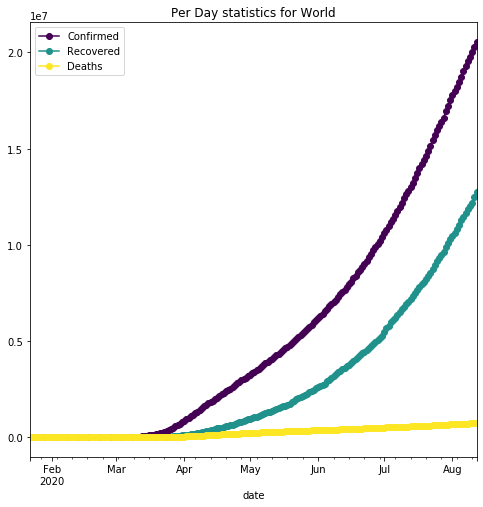

In [29]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

Here the perday statistics tells us the spreading is exponentially increasing day by day since the end of the March, 2020. Now after 5 months later the situation is worser than the previous days and still the cases are increasing exponentially without any kind of stoppings in the increment of the cases.

### Increment in the stats in the recent times (from 8th Aug, 2020 to 12th Aug, 2020)

In [30]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08   19552887   11859941  722147                 5457   
200 2020-08-09   19777015   12036593  726692                 4545   
201 2020-08-10   20004912   12201236  731557                 4865   
202 2020-08-11   20258858   12506131  737981                 6424   
203 2020-08-12   20536091   12747417  744724                 6743   

     Confirmed Case Increase  
199                   259447  
200                   224128  
201                   227897  
202                   253946  
203                   277233

Here on 12th August 2020 the number of confirmed cases has raised to 20536091, which is huge in numbers and almost 57% of the total population of the world. In that confirmed cases the Death toll rises to 744724 and still it is increasing day by day. 

**Global confirmed cases have been on an increasing trend and this has been largely contributed by Brazil and US at this moment as can be seen in the pie-chart. 29th July saw the highest increase in confirmed cases with 3.37L cases in a day.**

### Total Confirmed Cases in the World (Excluding China) upto 12th August, 2020

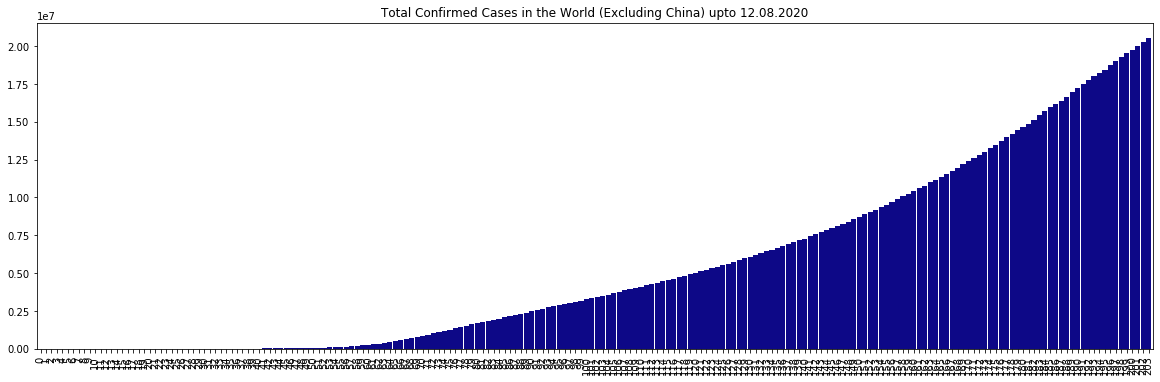

In [31]:
num_plot_global['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Confirmed Cases in the World (Excluding China) upto 12.08.2020',colormap='plasma')
plt.show()

### Total Recovered Cases in the World (Excluding China) upto 12th August, 2020

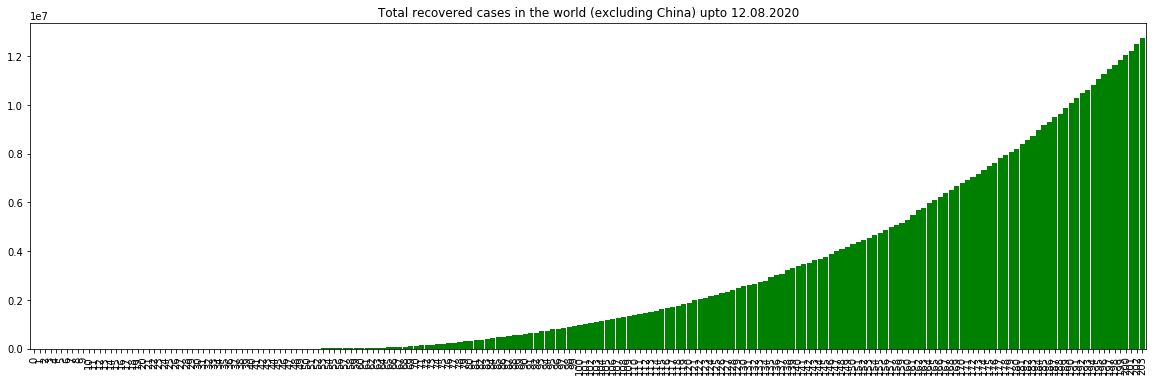

In [32]:
num_plot_global['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in the world (excluding China) upto 12.08.2020',colormap='ocean')
plt.show()

### Total Death Cases in the World (Excluding China) upto 12th August, 2020

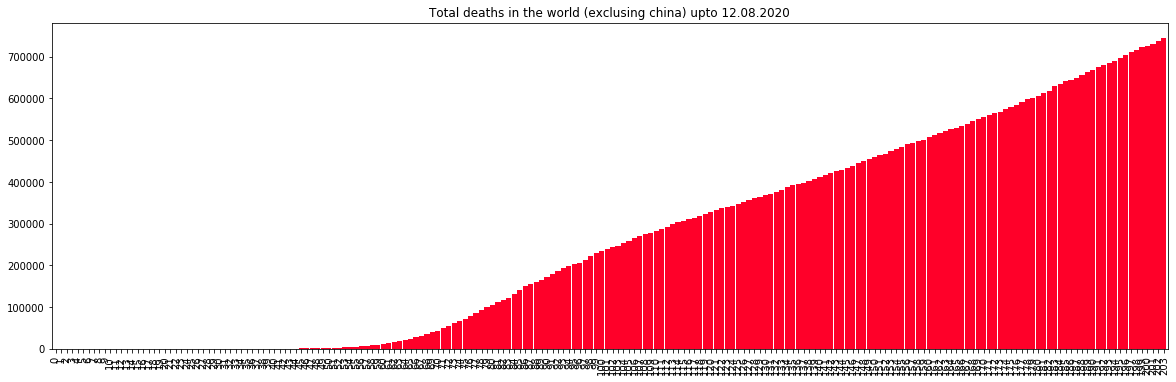

In [33]:
num_plot_global['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total deaths in the world (exclusing china) upto 12.08.2020',colormap='gist_rainbow')
plt.show()

### Total Confirmed Cases Increase in the World (Excluding China) upto 12th August, 2020

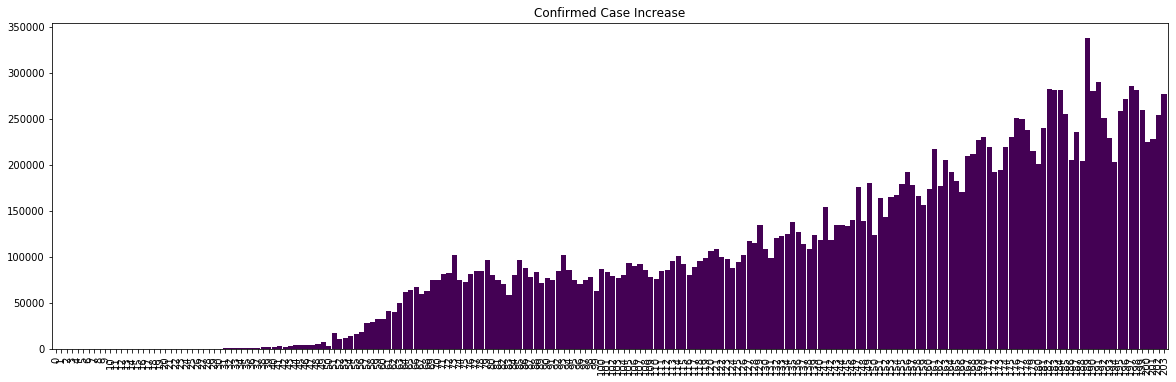

In [34]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.show()

### Death Cases Increase in the World (Excluding China) upto 12th August, 2020

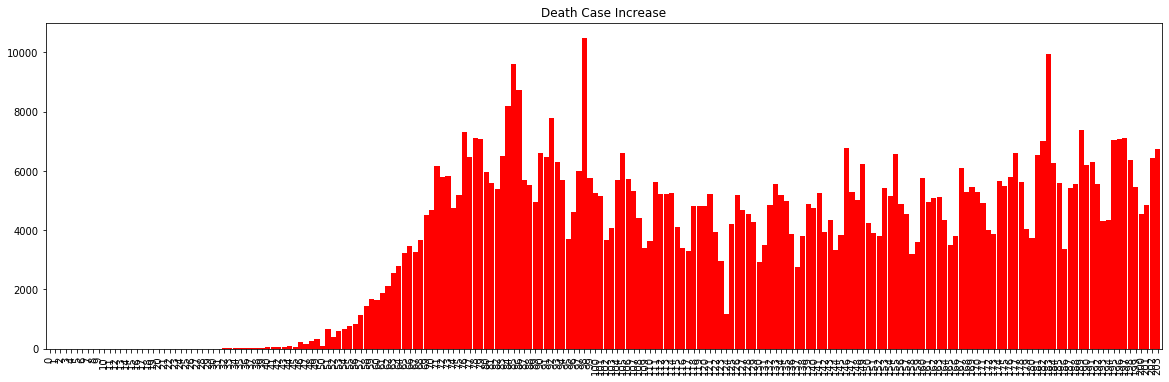

In [35]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='autumn')
plt.show()


Death cases have also been on the rise globally as seen below. 29th April has seen a drastic increase in the number of deaths in a single day(10485).

# ITALY - 2nd Epicentre

**Italy was the second epicentre for COVID19,hence lets look at these numbers. The numbers are high and confirmed cases are increasing by the day. However the increase rate for confirmed cases has been constant and may soon be seeing a plateau phase. Recovery and deaths were both neck to neck with some divergence over the last few days.Italy has more than 1L confirmed cases on 30th March**


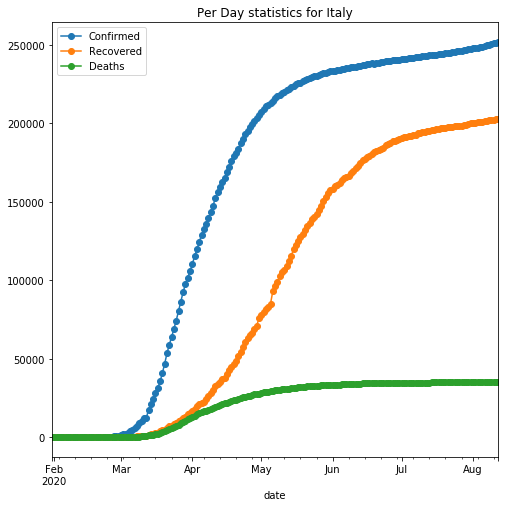

In [36]:
italy_cases_complete=df.loc[df['Country/Region']=='Italy']
italy_cases_complete['date'] = italy_cases_complete['ObservationDate'].dt.date
italy_cases_complete['date']=pd.to_datetime(italy_cases_complete['date'])
italy_cases_complete = italy_cases_complete[italy_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = italy_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Italy',marker='o')
plt.show()

In [37]:
num_plot_italy=num_plot.reset_index()
num_plot_italy['Death Case Increase']=0
num_plot_italy['Confirmed Case Increase']=0
num_plot_italy['Confirmed Case Increase'][0]=0
num_plot_italy['Death Case Increase'][0]=0
for i in range(1,num_plot_italy.shape[0]):
    num_plot_italy['Confirmed Case Increase'][i]=-(num_plot_italy.iloc[i-1][1]-num_plot_italy.iloc[i][1])
    num_plot_italy['Death Case Increase'][i]=-(num_plot_italy.iloc[i-1][3]-num_plot_italy.iloc[i][3])
num_plot_italy.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
190 2020-08-08     250103     201947   35203                   13   
191 2020-08-09     250566     202098   35205                    2   
192 2020-08-10     250825     202248   35209                    4   
193 2020-08-11     251237     202461   35215                    6   
194 2020-08-12     251713     202697   35225                   10   

     Confirmed Case Increase  
190                      347  
191                      463  
192                      259  
193                      412  
194                      476

For Italy the increase in confirmed cases have been in the range of 200-500 for the past few days.

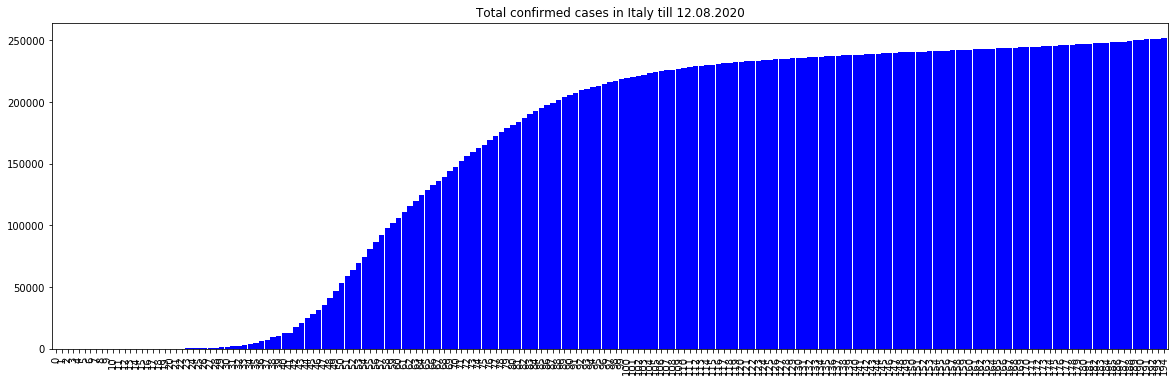

In [38]:
num_plot_italy['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total confirmed cases in Italy till 12.08.2020',colormap = 'winter')
plt.show()

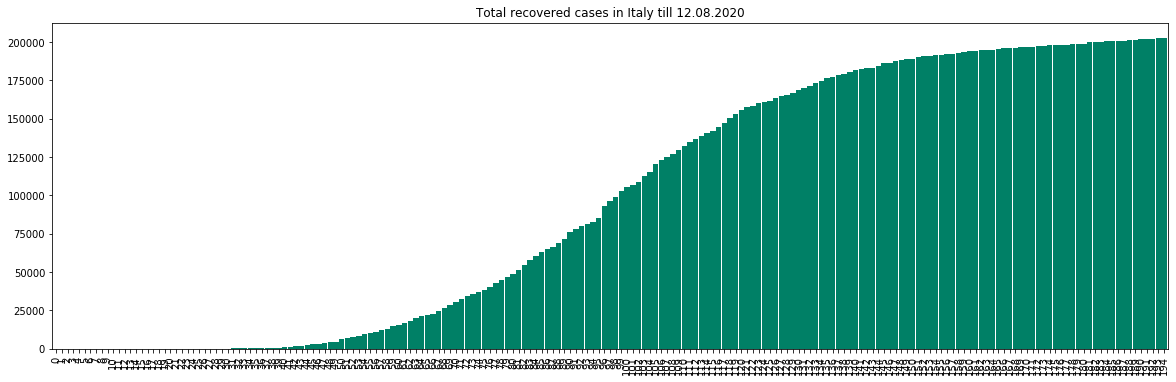

In [39]:
num_plot_italy['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in Italy till 12.08.2020',colormap = 'summer')
plt.show()

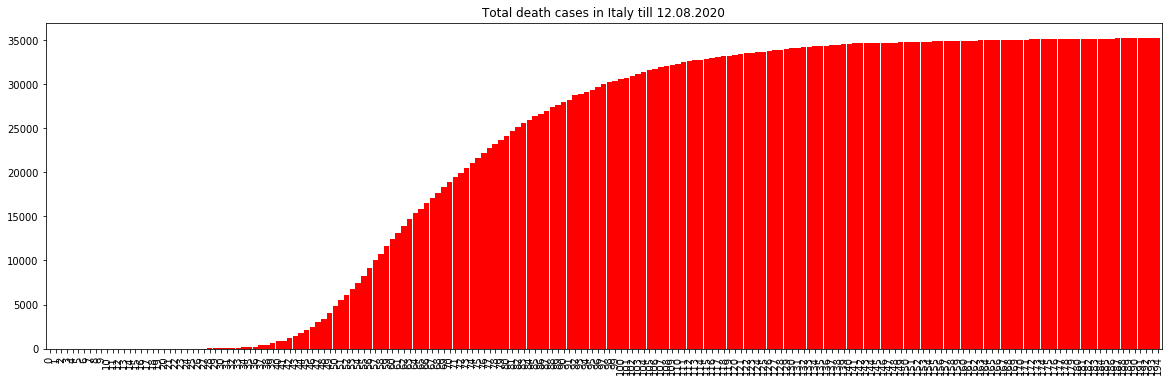

In [40]:
num_plot_italy['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total death cases in Italy till 12.08.2020',colormap = 'autumn')
plt.show()

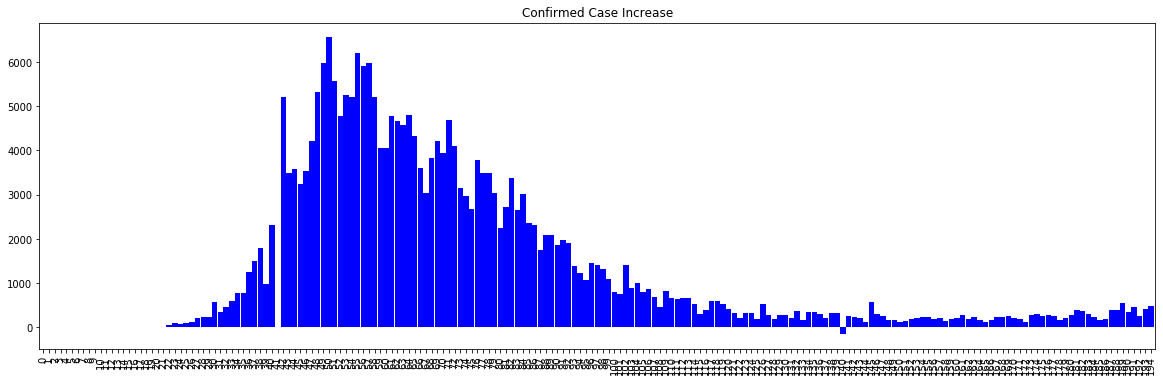

In [41]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap = 'winter')
plt.show()

**The highest number of deaths in Italy was seen on 27th March with 919 deaths reported**

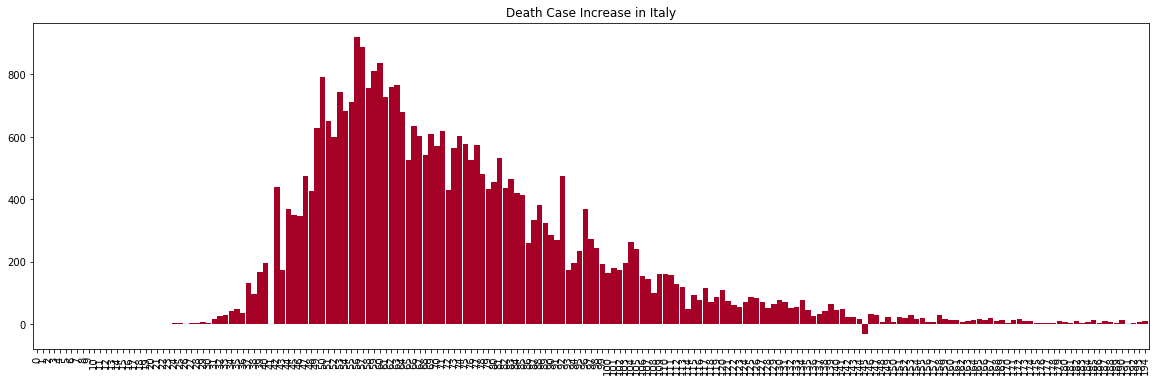

In [42]:
num_plot_italy['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase in Italy',colormap = 'RdYlBu')
plt.show()

# USA - 3rd Epicentre

*US was reaching flattening of curve stage, however last few days have again seen an increase in cases as can be seen below*

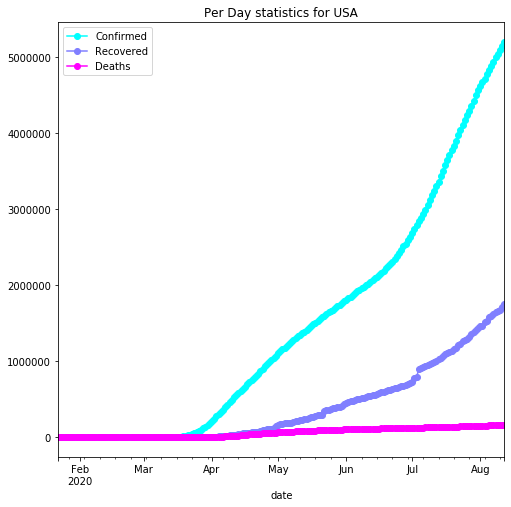

In [43]:
us_cases_complete=df.loc[df['Country/Region']=='US']
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date']=pd.to_datetime(us_cases_complete['date'])
us_cases_complete = us_cases_complete[us_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = us_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for USA',colormap='cool',marker='o')
plt.show()

In [44]:
num_plot_us=num_plot.reset_index()
num_plot_us['Death Case Increase']=0
num_plot_us['Confirmed Case Increase']=0
num_plot_us['Confirmed Case Increase'][0]=0
num_plot_us['Death Case Increase'][0]=0
for i in range(1,num_plot_us.shape[0]):
    num_plot_us['Confirmed Case Increase'][i]=-(num_plot_us.iloc[i-1][1]-num_plot_us.iloc[i][1])
    num_plot_us['Death Case Increase'][i]=-(num_plot_us.iloc[i-1][3]-num_plot_us.iloc[i][3])
num_plot_us.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08    4997929    1643118  162423                 1076   
200 2020-08-09    5044864    1656864  162938                  515   
201 2020-08-10    5094400    1670755  163463                  525   
202 2020-08-11    5141208    1714960  164527                 1064   
203 2020-08-12    5197118    1753760  166026                 1499   

     Confirmed Case Increase  
199                    56174  
200                    46935  
201                    49536  
202                    46808  
203                    55910

**On 16th July the confirmed case increase reached a peak of 78k in a day. Every 7 days we noticed a peak in the numbers previously however the peak nowadays occurs in 4-5 days.**

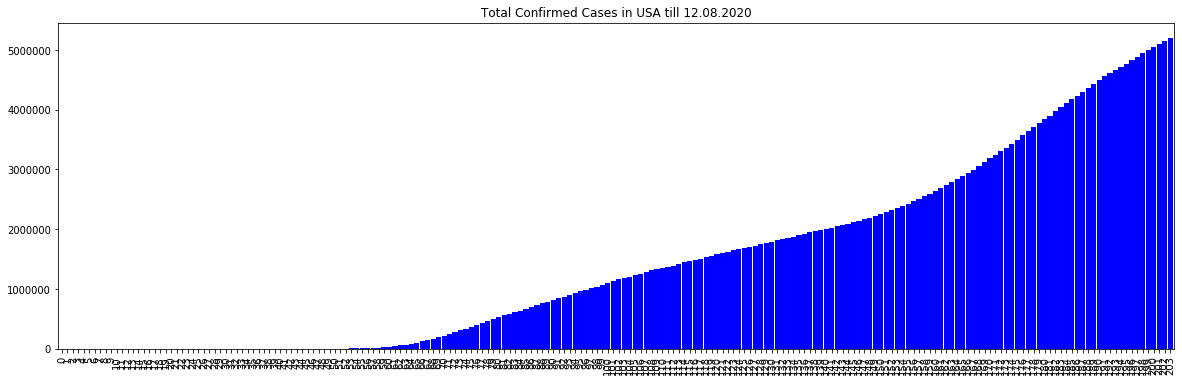

In [45]:
num_plot_us['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed Cases in USA till 12.08.2020')
plt.show()

This graph shows a certain flatness in the mid of June, 2020, But after that it is in the upswing mode with a steep slope upwards 

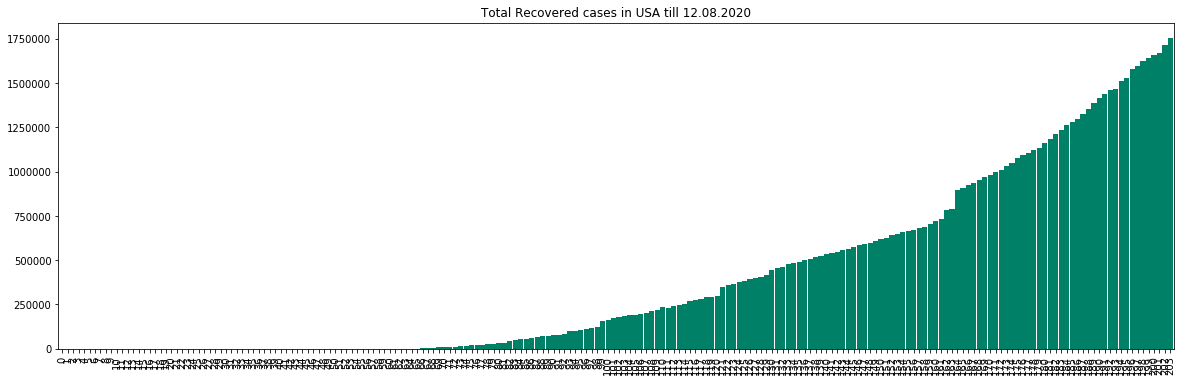

In [46]:
num_plot_us['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in USA till 12.08.2020')
plt.show()

The Death toll in United States is not flatten any more rather it is increasing day by day in a exponential manner with a steep slope upwards. It does not have any kind of peak till now so that it can flatten after a particular peak.

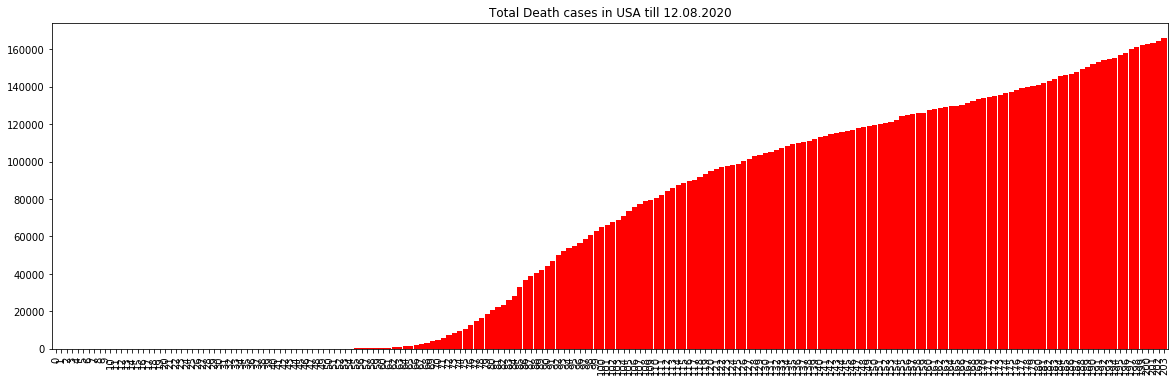

In [47]:
num_plot_us['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in USA till 12.08.2020')
plt.show()

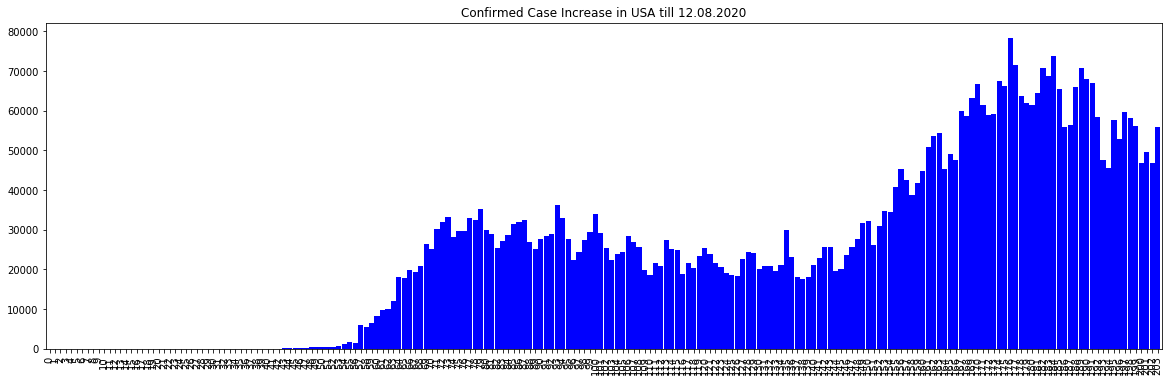

In [48]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed Case Increase in USA till 12.08.2020')
plt.show()

**In the mid of June the confirmed cases are decreased and the incrementation is flattened by a certain moment. But unfortunately in the last week July the incrementation in the confirmed cases are increased suddenly with a steep slope. After a week of steep slope in the increment of the confirmed cases there is a decrement in the confirmed cases in a daily basis manner. As we can see in the graph, that after a week of high rise the peaks are coming lower and lower day by day. Which shows that the confirmed cases and decrementing day by day slowly. It's really a big sign of improvement for United States**

**Similar increase has been seen in the deaths reported by US with highest number of deaths(4591) recorded on 16th April**

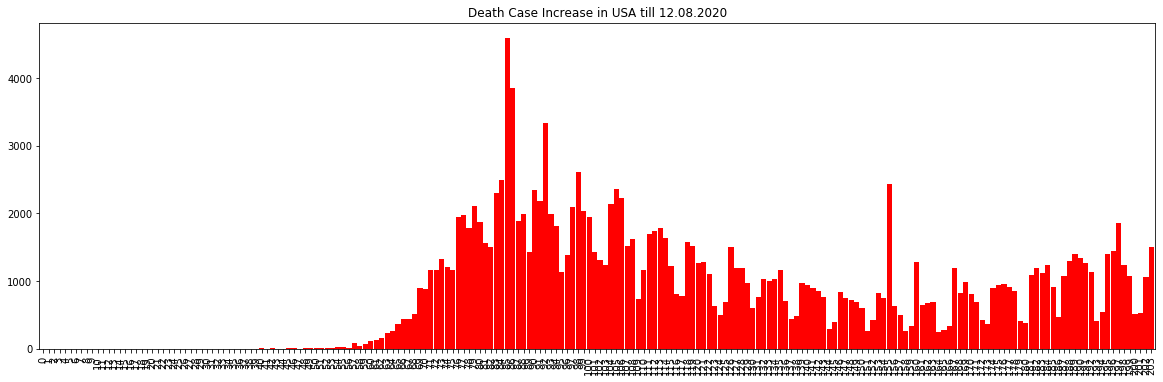

In [49]:
num_plot_us['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Death Case Increase in USA till 12.08.2020')
plt.show()

**As the graph shows that on the particular day of 16th April 2020 USA reported a highest no. of death cases. After that the death cases are slowly coming down to a certain limit but suddenly in the recent times the Death cases are increasing day by day which is very much annoying for USA**

# South Korea - The Most successful country to fight against Covid - 19

### Per Day Statistics for South Korea till 12th August, 2020

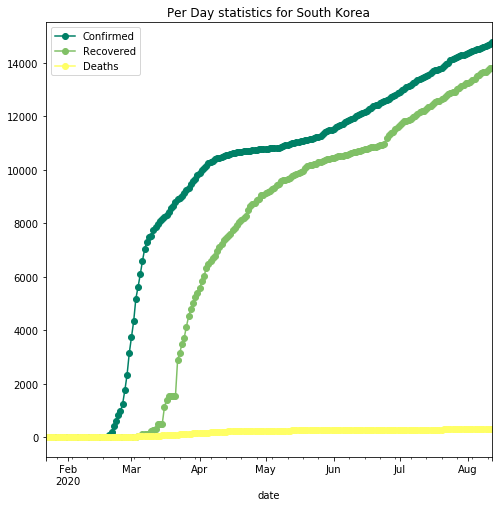

In [50]:
skorea_cases_complete=df.loc[df['Country/Region']=='South Korea']
skorea_cases_complete['date'] = skorea_cases_complete['ObservationDate'].dt.date
skorea_cases_complete['date']=pd.to_datetime(skorea_cases_complete['date'])
skorea_cases_complete = skorea_cases_complete[skorea_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = skorea_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for South Korea',colormap='summer',marker='o')
plt.show()

### No. of Informed cases in the recent times 

In [51]:
num_plot_skorea=num_plot.reset_index()
num_plot_skorea['Death Case Increase']=0
num_plot_skorea['Confirmed Case Increase']=0
num_plot_skorea['Confirmed Case Increase'][0]=0
num_plot_skorea['Death Case Increase'][0]=0
for i in range(1,num_plot_skorea.shape[0]):
    num_plot_skorea['Confirmed Case Increase'][i]=-(num_plot_skorea.iloc[i-1][1]-num_plot_skorea.iloc[i][1])
    num_plot_skorea['Death Case Increase'][i]=-(num_plot_skorea.iloc[i-1][3]-num_plot_skorea.iloc[i][3])
num_plot_skorea.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08      14598      13642     305                    1   
200 2020-08-09      14626      13658     305                    0   
201 2020-08-10      14660      13729     305                    0   
202 2020-08-11      14714      13786     305                    0   
203 2020-08-12      14770      13817     305                    0   

     Confirmed Case Increase  
199                       36  
200                       28  
201                       34  
202                       54  
203                       56

**In the recent times if we check out the no. of Confirmed case Increase, we can find that the cases are bearly minor as compared to the whole world. And the Death Case Increment is now down to 0 in the recent times. Which shows that SOUTH KOREA is able to fought against the virus with minimum casualties of 305 till 12th August, 2020** 

### Total no. of Confirmed cases in South Korea till 12th August, 2020

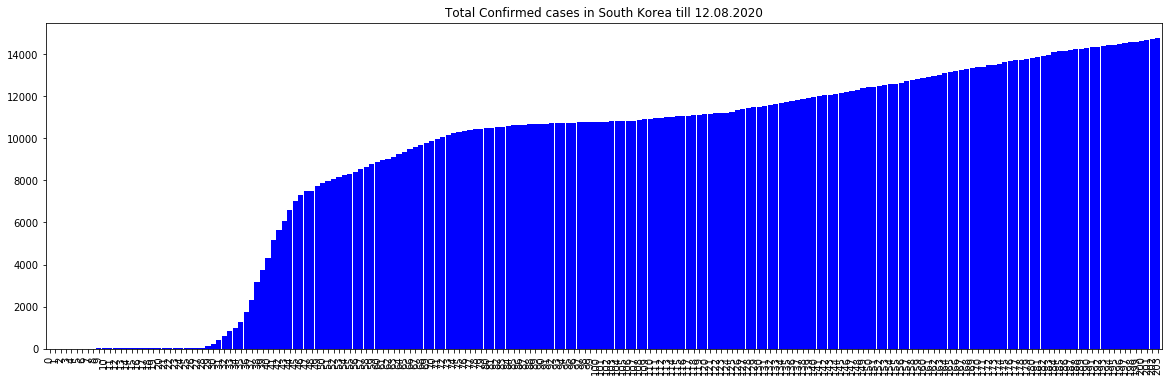

In [52]:
num_plot_skorea['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in South Korea till 12.08.2020')
plt.show()

### Total no. of Recovered cases in South Korea till 12th August, 2020

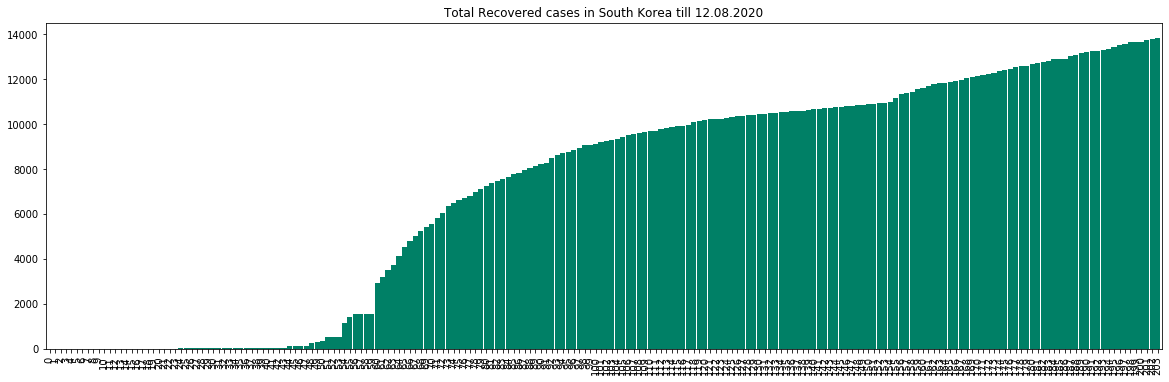

In [53]:
num_plot_skorea['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in South Korea till 12.08.2020')
plt.show()

### Total no. Death Cases in South Korea till 12th August, 2020

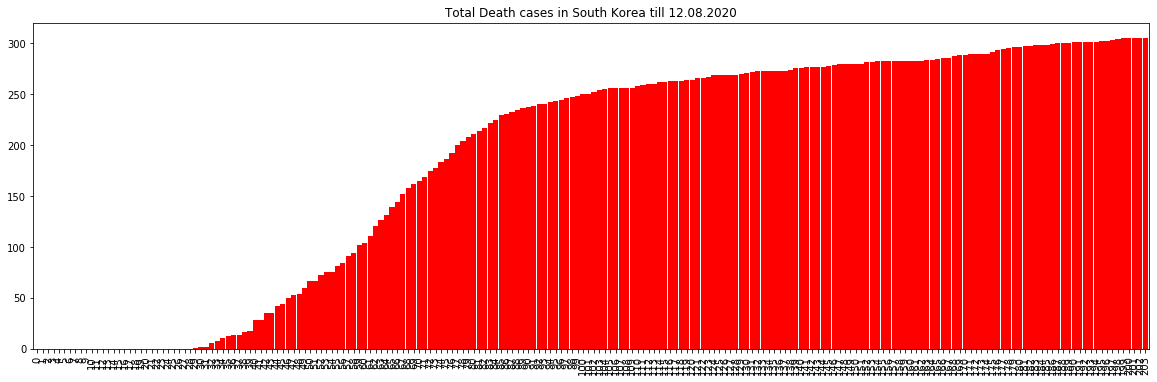

In [54]:
num_plot_skorea['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in South Korea till 12.08.2020')
plt.show()

**From the above three graphs we can have a clear look that how the graph flattens and as a result the exponential growth has been stopped. Which clearly indicates that South Korea has fought against the virus quite brilliantly**

### Confirm case increment in South Korea till 12th August, 2020

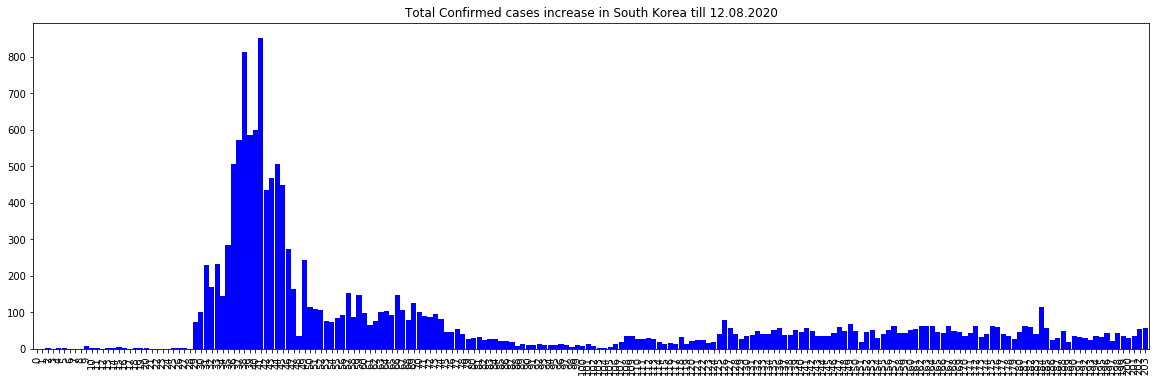

In [55]:
num_plot_skorea['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='bwr',title='Total Confirmed cases increase in South Korea till 12.08.2020')
plt.show()

As we can see that the confirm cases are lowered to merely 100 per day which signifies the great work of South Korea to fought against the virus

### Death case increment in South Korea till 12th August, 2020

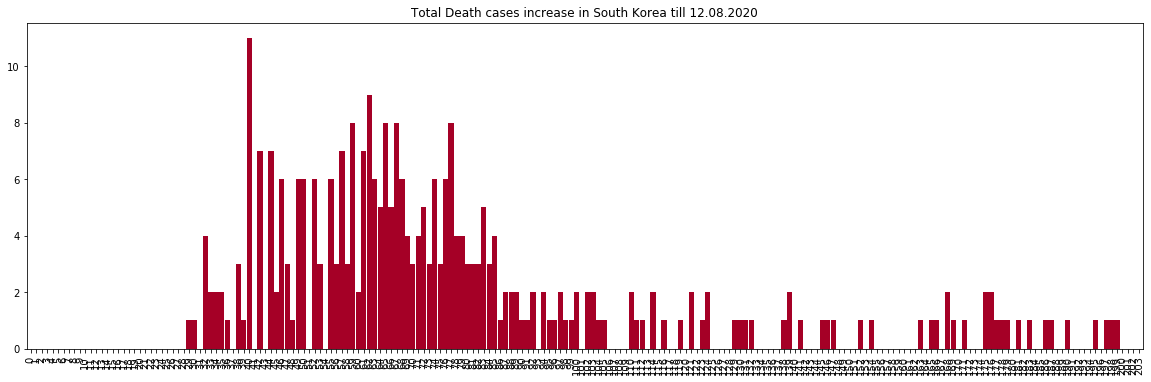

In [56]:
num_plot_skorea['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Total Death cases increase in South Korea till 12.08.2020')
plt.show()

Also the Death Cases are lowered to 2 to 4 and from the recent few days it turns out to be 0

# United Kingdom - Recovered from Covid-19 or not?

### Per Day Statistics for United Kingdom till 12th August, 2020

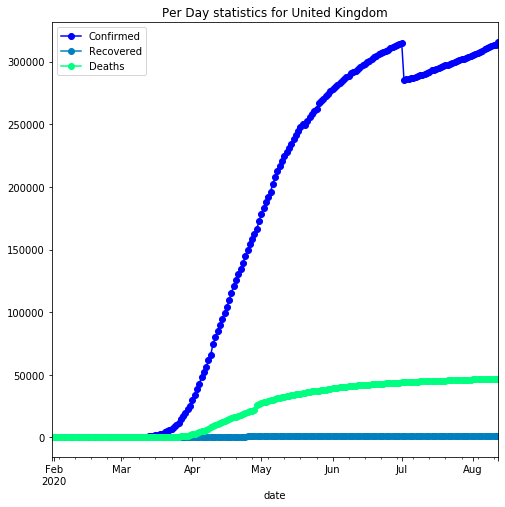

In [57]:
uk_cases_complete=df.loc[df['Country/Region']=='UK']
uk_cases_complete['date'] = uk_cases_complete['ObservationDate'].dt.date
uk_cases_complete['date']=pd.to_datetime(uk_cases_complete['date'])
uk_cases_complete = uk_cases_complete[uk_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = uk_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for United Kingdom',colormap='winter',marker='o')
plt.show()

### Cases reported in last few days in UK

In [58]:
num_plot_uk=num_plot.reset_index()
num_plot_uk['Death Case Increase']=0
num_plot_uk['Confirmed Case Increase']=0
num_plot_uk['Confirmed Case Increase'][0]=0
num_plot_uk['Death Case Increase'][0]=0
for i in range(1,num_plot_uk.shape[0]):
    num_plot_uk['Confirmed Case Increase'][i]=-(num_plot_uk.iloc[i-1][1]-num_plot_uk.iloc[i][1])
    num_plot_uk['Death Case Increase'][i]=-(num_plot_uk.iloc[i-1][3]-num_plot_uk.iloc[i][3])
num_plot_uk.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
190 2020-08-08     311461       1449   46651                   55   
191 2020-08-09     312574       1451   46659                    8   
192 2020-08-10     313392       1463   46611                  -48   
193 2020-08-11     313394       1464   46611                    0   
194 2020-08-12     315581       1472   46791                  180   

     Confirmed Case Increase  
190                      765  
191                     1113  
192                      818  
193                        2  
194                     2187

### Total Confirmed Cases in UK till 12th August, 2020

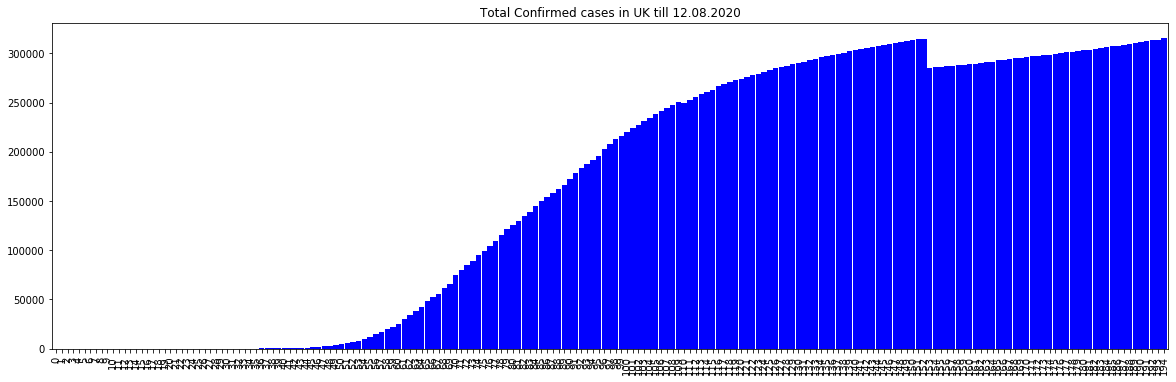

In [59]:
num_plot_uk['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in UK till 12.08.2020')
plt.show()

### Total Recovered cases in UK till 12th August, 2020

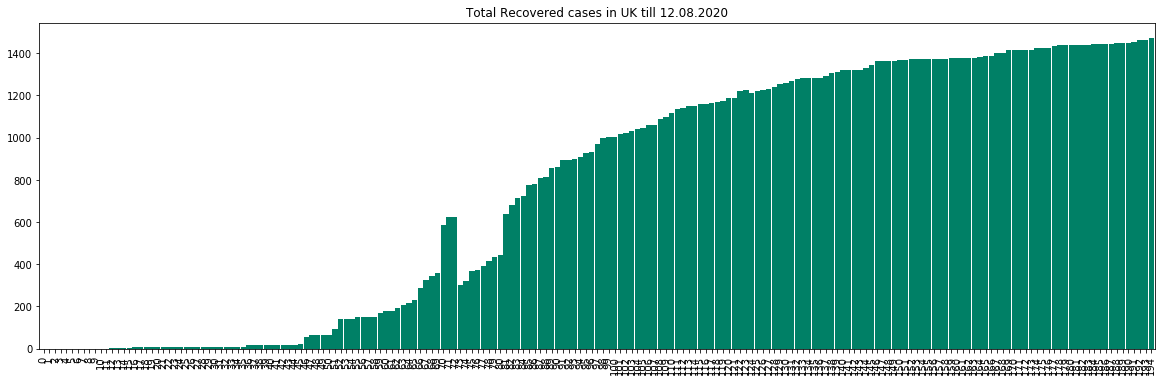

In [60]:
num_plot_uk['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in UK till 12.08.2020')
plt.show()

### Total Casualties in UK till 12th August, 2020

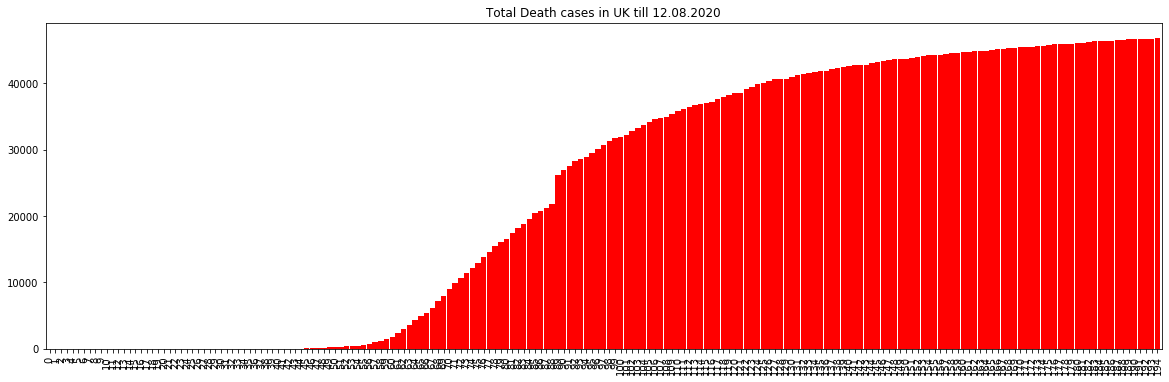

In [61]:
num_plot_uk['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in UK till 12.08.2020')
plt.show()

**From the Plottings we can clearly observe that the confirmed, recovered and death tolls are flattened pretty much. Which signifies that UK is pretty much controlled the situation**

### Death Cases increased in UK till 12th August, 2020

**From the analysis we can observe that after the certain stage of the pandemic situation the number of confirmed cases are decreased and level up at a certain range. In the recent days the cases are reported near about 100**

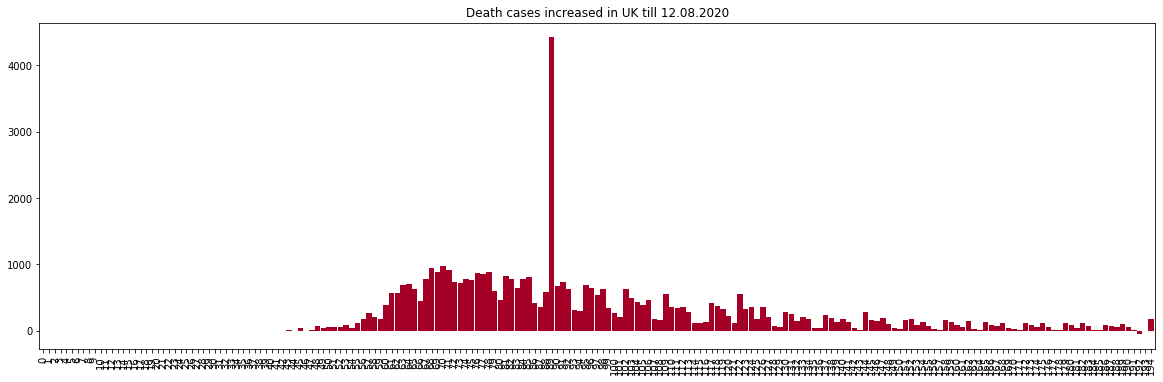

In [62]:
num_plot_uk['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in UK till 12.08.2020')
plt.show()

**From the above observation we can also find out that the death cases are not reported in a huge manner in the recent times. The reported death cases are like under 10 per day, some days it is being reported as 0. From the above analysis it is clearly visible to us that the United Kingdom is fought against the pandemic situation quite brilliantly!**

### Conclusion : United Kingdom has fought well against the Covid-19!

# Does Germany defeat Covid-19 like UK did?

### Per Day Statistics for Germany till 12th August, 2020

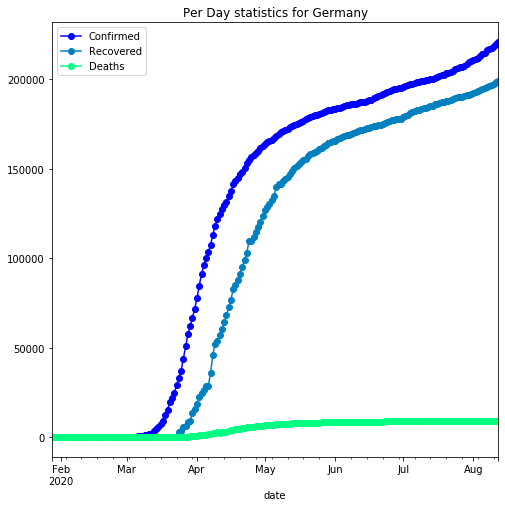

In [63]:
germany_cases_complete=df.loc[df['Country/Region']=='Germany']
germany_cases_complete['date'] = germany_cases_complete['ObservationDate'].dt.date
germany_cases_complete['date']=pd.to_datetime(germany_cases_complete['date'])
germany_cases_complete = germany_cases_complete[germany_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = germany_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Germany',colormap='winter',marker='o')
plt.show()

### Cases reported in the last few days in Germany

In [64]:
num_plot_germany=num_plot.reset_index()
num_plot_germany['Death Case Increase']=0
num_plot_germany['Confirmed Case Increase']=0
num_plot_germany['Confirmed Case Increase'][0]=0
num_plot_germany['Death Case Increase'][0]=0
for i in range(1,num_plot_germany.shape[0]):
    num_plot_germany['Confirmed Case Increase'][i]=-(num_plot_germany.iloc[i-1][1]-num_plot_germany.iloc[i][1])
    num_plot_germany['Death Case Increase'][i]=-(num_plot_germany.iloc[i-1][3]-num_plot_germany.iloc[i][3])
num_plot_germany.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
193 2020-08-08     216903     196550    9201                    6   
194 2020-08-09     217288     196783    9202                    1   
195 2020-08-10     218508     197382    9203                    1   
196 2020-08-11     219540     198347    9208                    5   
197 2020-08-12     220859     198991    9213                    5   

     Confirmed Case Increase  
193                      707  
194                      385  
195                     1220  
196                     1032  
197                     1319

### Total confirmed cases in Germany till 12th August, 2020

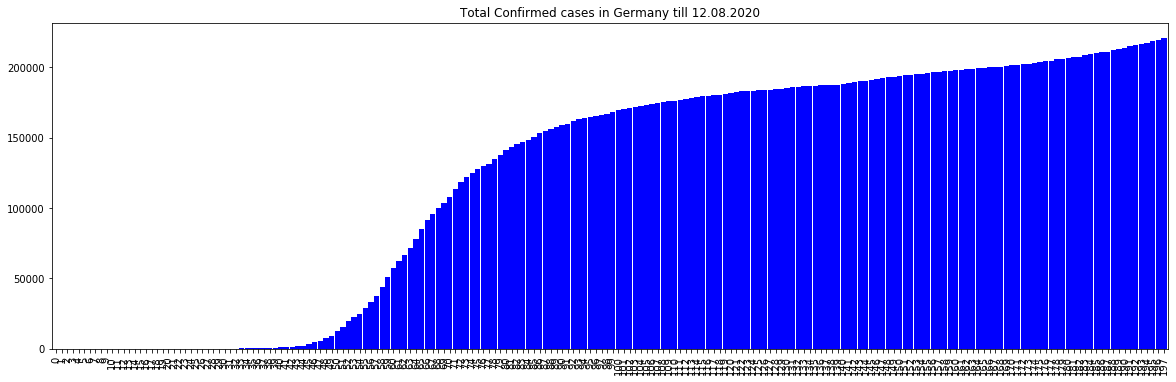

In [65]:
num_plot_germany['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Germany till 12.08.2020')
plt.show() 

### Total Recovered cases in Germany till 12th August, 2020

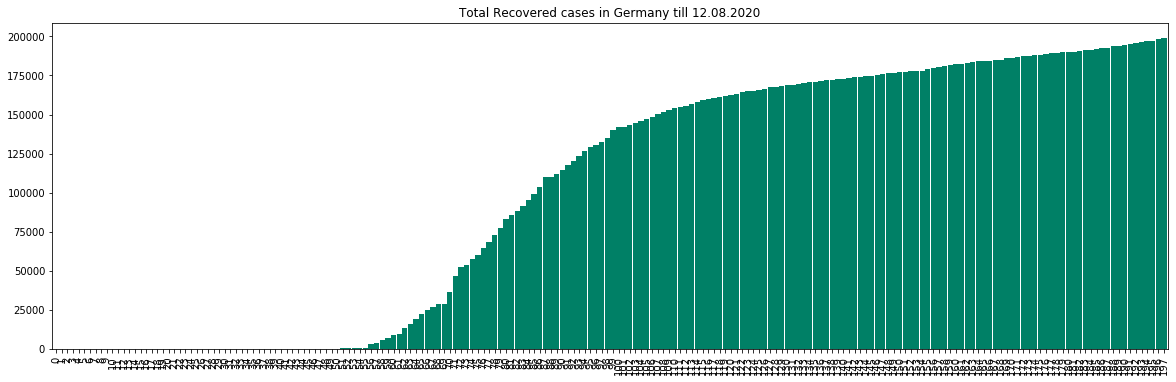

In [66]:
num_plot_germany['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Germany till 12.08.2020')
plt.show()

### Total Death Cases in Germany till 12th August, 2020

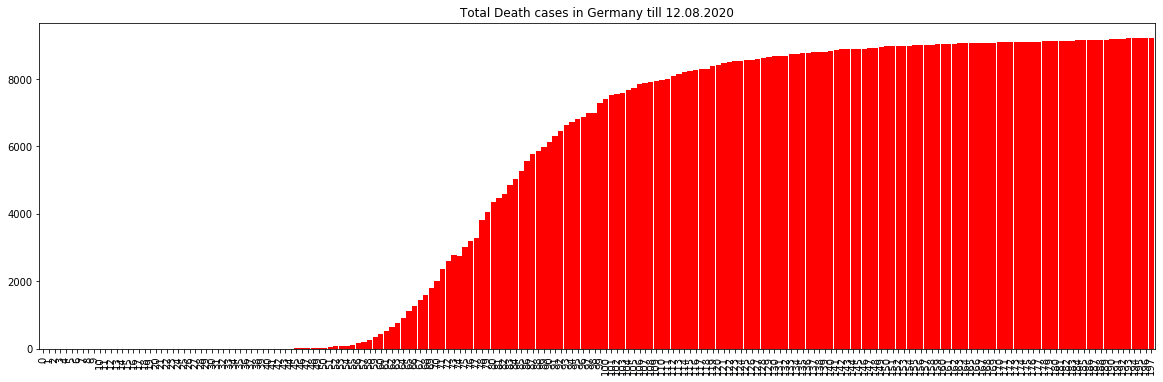

In [67]:
num_plot_germany['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Germany till 12.08.2020')
plt.show()

**From the graphical analysis of the Total Confirmed cases, Recovered cases and death cases we have seen that the graph is flattened after the peak occured. Which shows that the country is doing quite great job to fight against the virus**

### Confirmed cases increased in Germany till 12th August, 2020

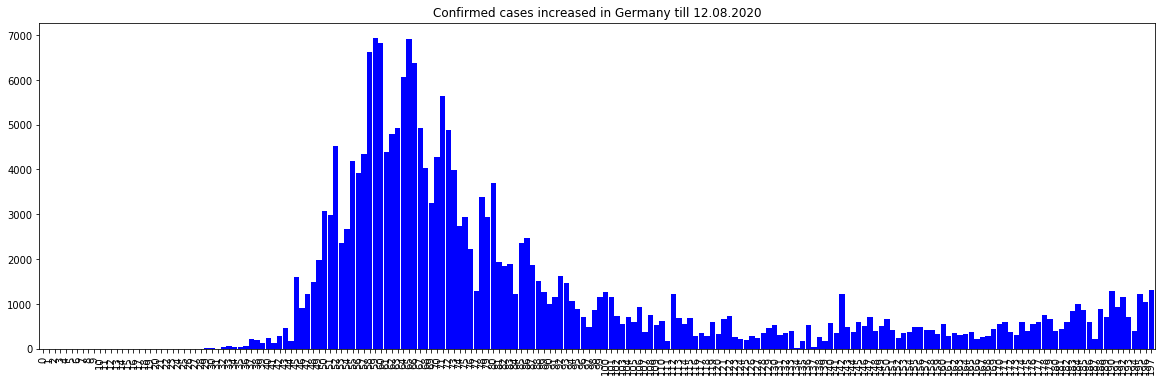

In [68]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Germany till 12.08.2020')
plt.show()

**From the graph analysis we have got that the confirmed cases are now lowered to 1000 whereas the peak was at the 7000 mark a few months back. Which seems that the country is healing!**

### Death Cases Increased in Germany till 12th August, 2020

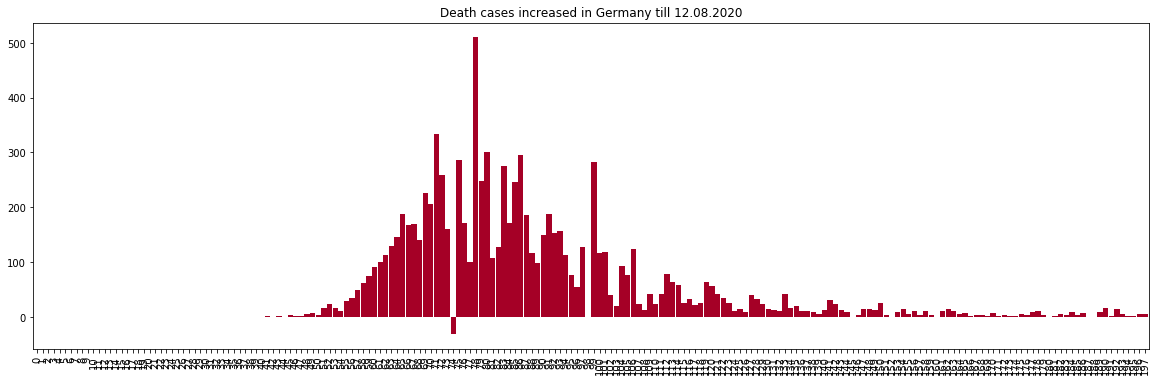

In [69]:
num_plot_germany['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Germany till 12.08.2020')
plt.show()

**As per the analysis the Death tolls decreased to minimal numbers and it is clearly shows that Germany has fought against the virus pretty much**

### From the analysis we can say that, Germany has overcome the pandemic situation positively!

# Does the Tech-country, Japan overcome the situation?

### Per day statistics for Japan, till 12th August, 2020

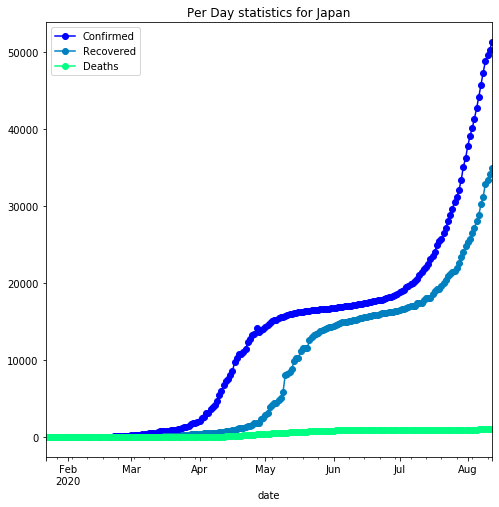

In [70]:
japan_cases_complete=df.loc[df['Country/Region']=='Japan']
japan_cases_complete['date'] = japan_cases_complete['ObservationDate'].dt.date
japan_cases_complete['date']=pd.to_datetime(japan_cases_complete['date'])
japan_cases_complete = japan_cases_complete[japan_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = japan_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Japan',colormap='winter',marker='o')
plt.show()

### Cases reported in recent times in Japan

In [71]:
num_plot_japan=num_plot.reset_index()
num_plot_japan['Death Case Increase']=0
num_plot_japan['Confirmed Case Increase']=0
num_plot_japan['Confirmed Case Increase'][0]=0
num_plot_japan['Death Case Increase'][0]=0
for i in range(1,num_plot_japan.shape[0]):
    num_plot_japan['Confirmed Case Increase'][i]=-(num_plot_japan.iloc[i-1][1]-num_plot_japan.iloc[i][1])
    num_plot_japan['Death Case Increase'][i]=-(num_plot_japan.iloc[i-1][3]-num_plot_japan.iloc[i][3])
num_plot_japan.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08      47342      31248    1042                    0   
200 2020-08-09      48782      32867    1047                    5   
201 2020-08-10      49617      33450    1052                    5   
202 2020-08-11      50302      34136    1058                    6   
203 2020-08-12      51288      34969    1066                    8   

     Confirmed Case Increase  
199                     1578  
200                     1440  
201                      835  
202                      685  
203                      986

**In the recent times the number of confirmed cases are increasing suddenly, and also it increases the death toll in the recent 5days as of 12th August, 2020**

### Total no. of Confirmed cases in Japan till 12th August, 2020

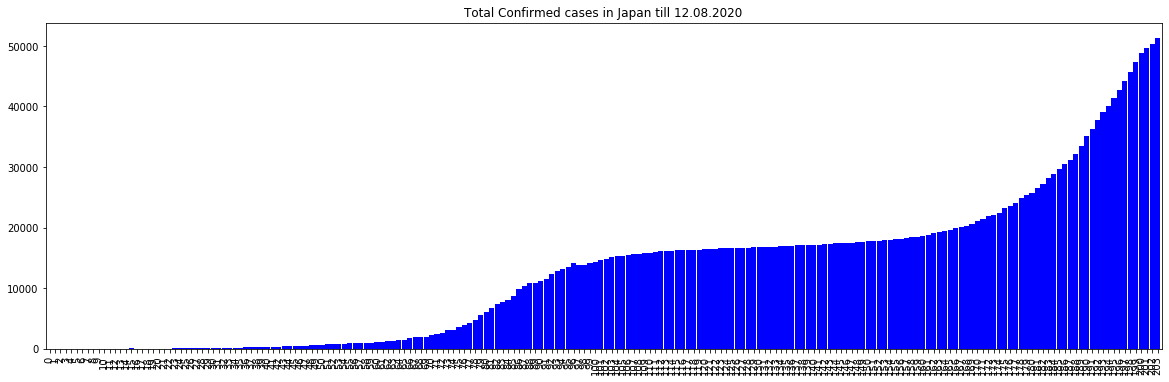

In [72]:
num_plot_japan['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Japan till 12.08.2020')
plt.show()

**As per the graphical analysis of the data we can observe that the confirmed cases are flattened at the 20000 mark and at that period we all thought that Japan has fought against the virus very well. But unfortunately in the last 2 weeks there is suddenly an upswing with steep slope upwards has been shown in the curve. This cost Japan an increment in the Total no. of Confirmed cases from merely 20000 to a rapid 50000 in just two weeks. But the main part of the tension is the new slope in the curve is very much steep and it's upswinging day by day. It does not provide any kind of flatness in the curve which may cost Japan at a very high risk**

### Total no. of Recovered cases in Japan, till 12th August, 2020

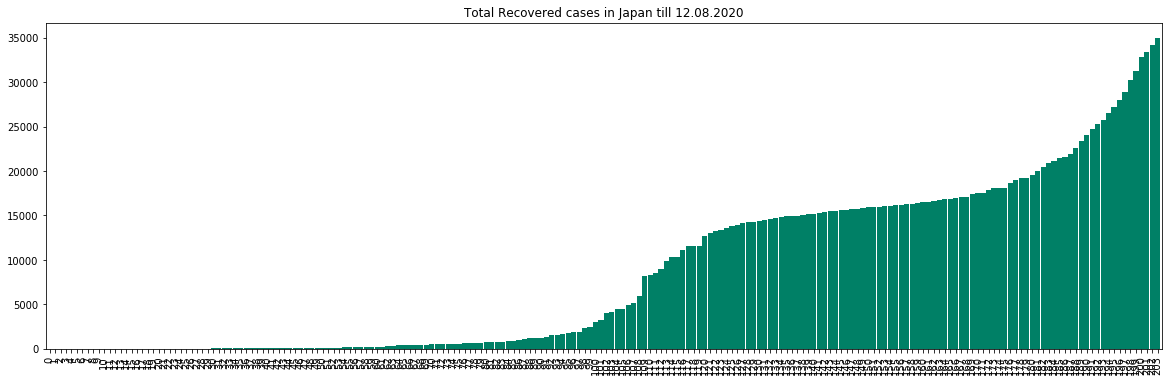

In [73]:
num_plot_japan['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Japan till 12.08.2020')
plt.show()

**If we think about the curve of the confirmed cases the recovery rate is also upswinging manner. That will help Japan to get rid of this high situation**

### Total no. of Death cases in Japan till 12th August, 2020

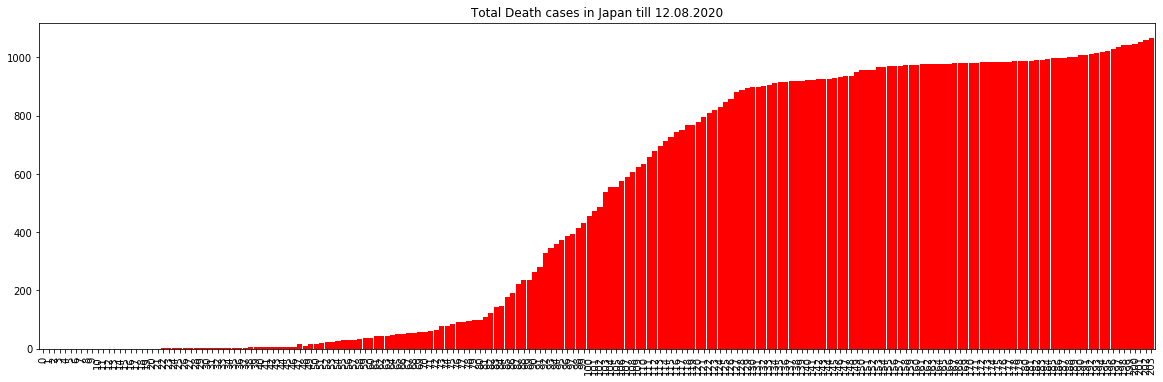

In [74]:
num_plot_japan['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Japan till 12.08.2020')
plt.show()

**As per the curve of the Total confirmed cases and total recovered cases we can easily said that, Japan made a huge impact in the in earlier days as a result they saw a flattened curve for 1-2 months. But whwnever they thought that this could end the spread of the virus and re-opened everything, at the very moment thay have seen the upswinging curve suddenly. But a blessing for Japan is that they have controlled the Death cases, as we can see in the curve that it is flattened from last 3 months and there is no sudden increment in the curve. Which shows a good sign for the Japan Government. But still Japan have to be cautious about the upswinging curve of the confirmed cases though the Death toll is under control right now** 

### Confirmed cases increased in Japan till 12th August, 2020

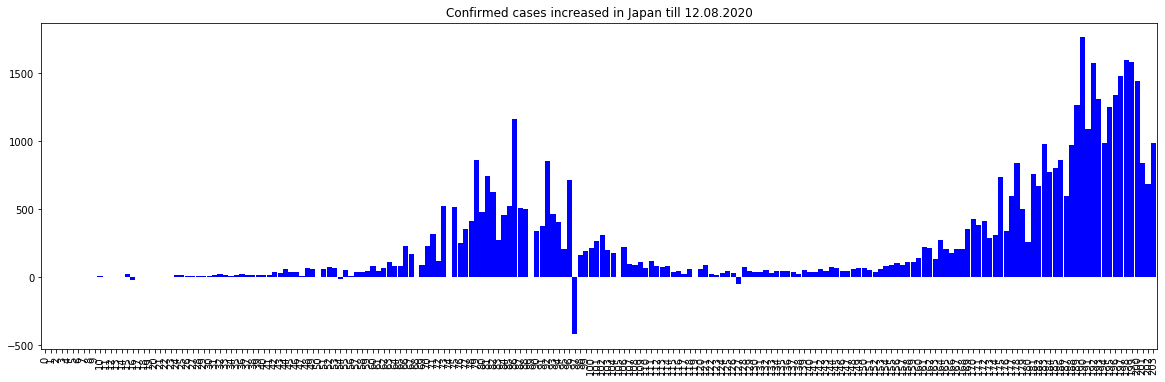

In [75]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Japan till 12.08.2020')
plt.show()

**As you can clearly observe that the peaks are coming in the recent times though they are not coming in between of the two peaks in a gap of 2 - 3 months. In the month of May, Japan have shown a massive increment day to day confirmed cases and after that they have managed to bring the manhattans down. but unfortunately the day to day confirmed cases are increasing in a drastic manner from the previous one. The upswing is much more steeper than the previous manhattans. Which may cost Japan!** 

### Death Cases increase in Japan till 12th August, 2020

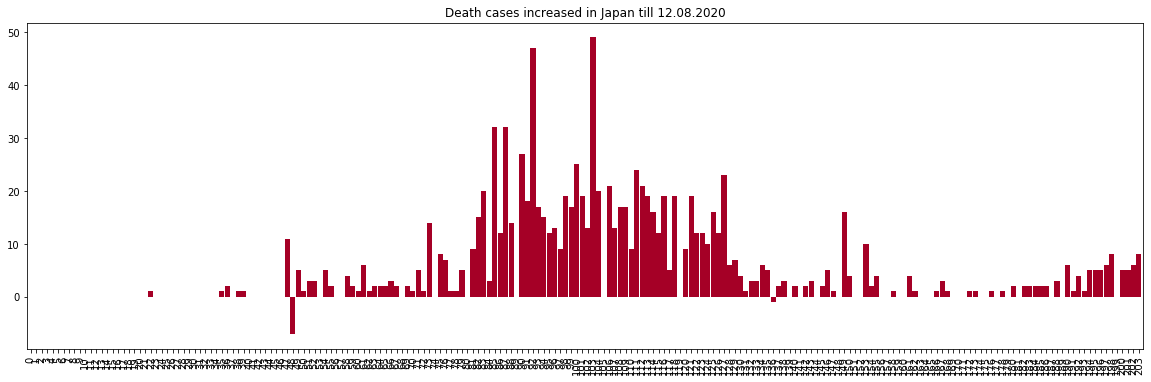

In [76]:
num_plot_japan['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Japan till 12.08.2020')
plt.show()

**But it is really strange that in the recent times the day to day confirmed cases are increasing in an exponential manner but the death toll is flattened in the past 3 months. Which shows the dedications of the doctors and the management of Japan Government to prevent the death toll in this high time of spreading. Which is a great news and achievement for Japan**

### In the last 2-3 months Japan have flattened the curve of the confirmed cases, but unfortunately whenever they are all set to re-open everything at that very moment the confirmed cases are increasing drastically and higher than the previous upswings. Japan has controlled the situation but right now suddnly they are also facing the huge upswings and the steep slopes in the curve, though they have prevent the death tolls in the recent high time. 

# Australia - Did they defeat Covid-19 ?

### Per Day statistics for Australia till 12th August, 2020

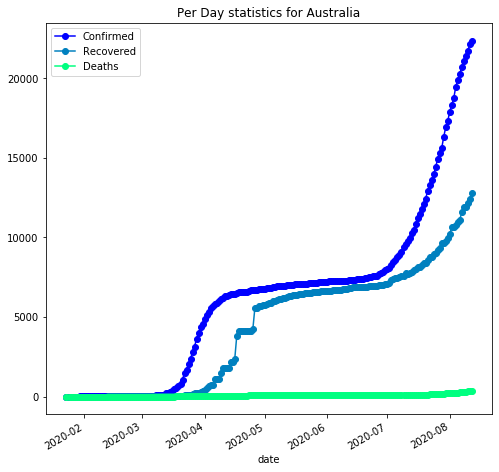

In [77]:
aus_cases_complete=df.loc[df['Country/Region']=='Australia']
aus_cases_complete['date'] = aus_cases_complete['ObservationDate'].dt.date
aus_cases_complete['date']=pd.to_datetime(aus_cases_complete['date'])
aus_cases_complete = aus_cases_complete[aus_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = aus_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Australia',colormap='winter',marker='o')
plt.show()

### Cases reported in the recent times in Australia

In [78]:
num_plot_aus=num_plot.reset_index()
num_plot_aus['Death Case Increase']=0
num_plot_aus['Confirmed Case Increase']=0
num_plot_aus['Confirmed Case Increase'][0]=0
num_plot_aus['Death Case Increase'][0]=0
for i in range(1,num_plot_aus.shape[0]):
    num_plot_aus['Confirmed Case Increase'][i]=-(num_plot_aus.iloc[i-1][1]-num_plot_aus.iloc[i][1])
    num_plot_aus['Death Case Increase'][i]=-(num_plot_aus.iloc[i-1][3]-num_plot_aus.iloc[i][3])
num_plot_aus.tail()

date  Confirmed  Recovered  Deaths  Death Case Increase  \
197 2020-08-08      21084      11874     295                   17   
198 2020-08-09      21397      11876     313                   18   
199 2020-08-10      21713      12144     331                   18   
200 2020-08-11      22127      12395     352                   21   
201 2020-08-12      22358      12779     361                    9   

     Confirmed Case Increase  
197                      386  
198                      313  
199                      316  
200                      414  
201                      231

### Total no. of confirmed cases in Australia till 12th August, 2020

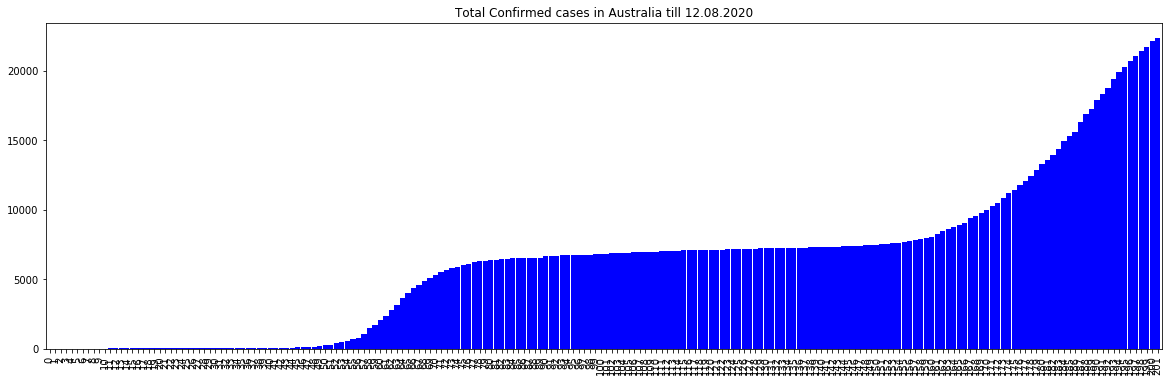

In [79]:
num_plot_aus['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Australia till 12.08.2020')
plt.show()

**As we can see that the flattened curve is upswinging nowadays, which may cause some serious issues for the country in the recent times. The upswinging curve of total confirmed cases show that the no. of confirmed cases are increased in the recent times and it's happening suddenly like Japan is facing**

### Total no. of Recovered cases in Australia till 12th August, 2020

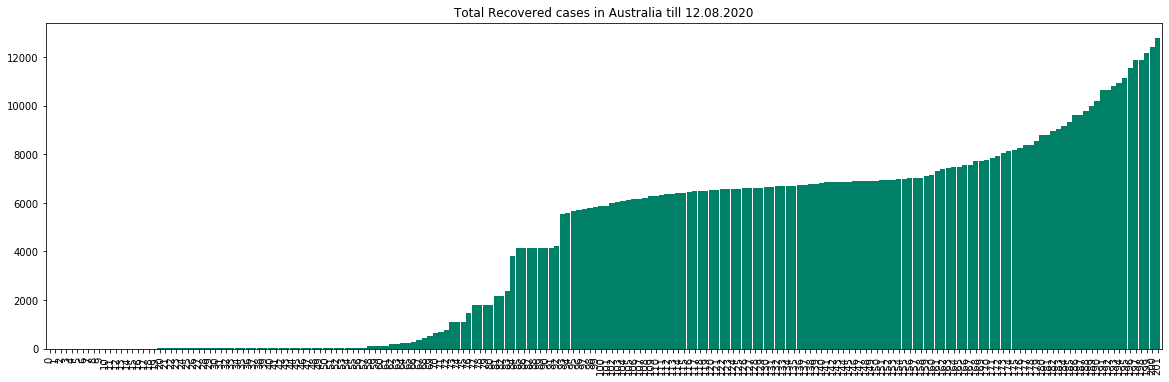

In [80]:
num_plot_aus['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Australia till 12.08.2020')
plt.show()

**As we can observe that the curve of the confirmed cases are increasing day by day and beside that the recovered cases are also increasing which shows a pretty positive sign for the country**

### Total no. of Death Cases in Australia till 12th August, 2020

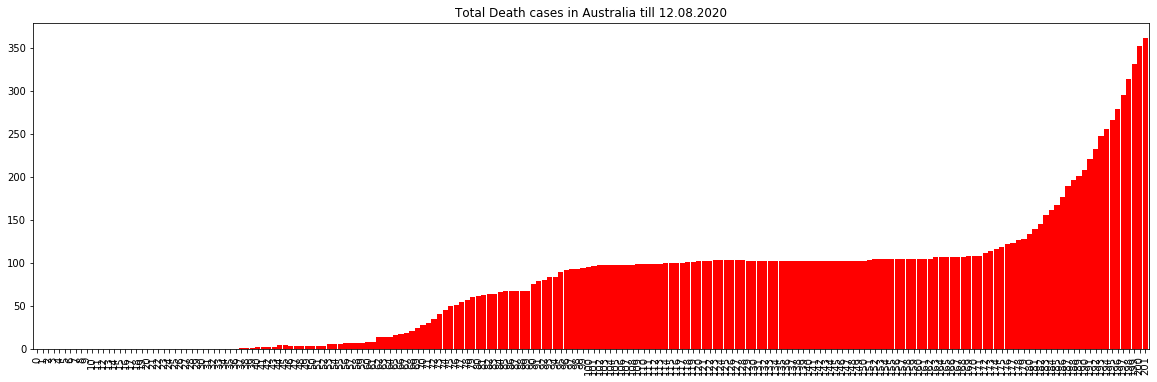

In [81]:
num_plot_aus['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Australia till 12.08.2020')
plt.show()

**The Death toll is also increasing with the increment of the total confirmed cases. Which may cost the country after a certain relaxation period of flattened curve**

### Confirmed cases increased in Australia till 12th August, 2020

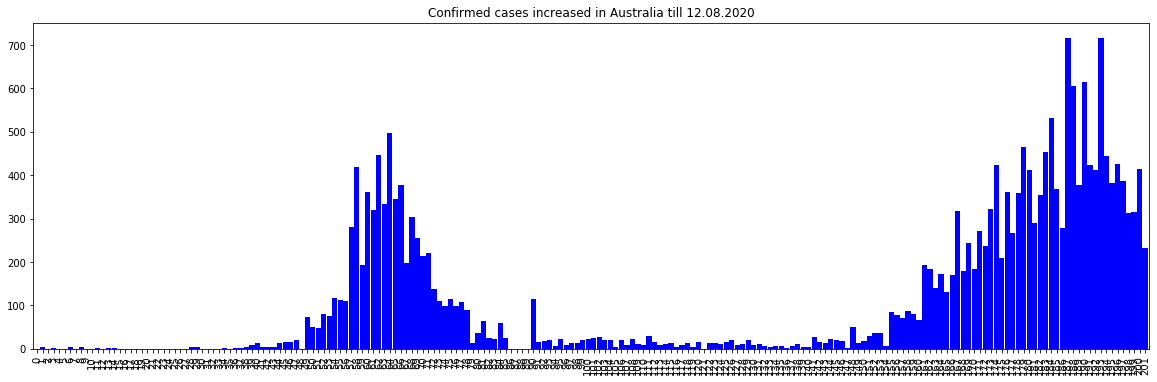

In [82]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Australia till 12.08.2020')
plt.show()

**As the confirmed cases are increasing day by day in a huge manner it is very difficult to show composure for the Government of Australia. The confirmed cases were came down to 50 in the past 2-3 months after the drastic situation. But unfortuanately it's growing higher than the previous manhattans and showing a peak of 700 per day. But the good thing is that, in the recent times the confirmed cases per day are come down to 400 mark, which shows a good sign for Australia**

### Death cases increased in Australia till 12th August, 2020

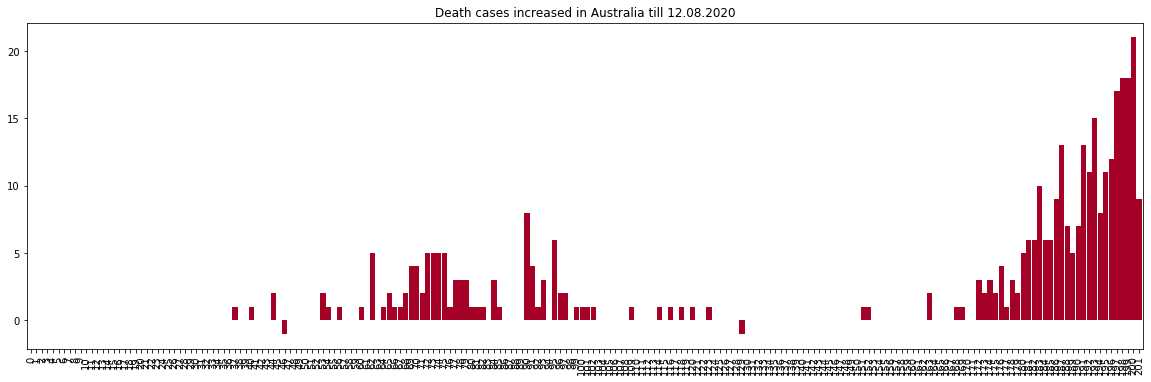

In [83]:
num_plot_aus['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Australia till 12.08.2020')
plt.show()

**In the recent times the death toll is increasing in the day to day basis in a huge quantity, which may cost the Government of Australia in this pandemic situation. The death toll is increasing day by day very much in Australia. The highest death toll is shown in the day of 11th August, 2020 where the death toll rises to 21, the highest in the whole pandemic  situation**

### Australia had prevented the spreading of the virus but recently the country has shown the unconditional increase in the confirmed and death cases day to day

# LOCKDOWN - The Saviour or not ?

#### RED LINE shows the date of IMPOSING LOCKDOWN

#### GREEN LINE shows the date of REVOKING LOCKDOWN

## China's Lockdown Period - SUCCESSFUL

**China impossed lockdown on 23rd January, 2020**

**China revoked lockdown on 8th April, 2020**

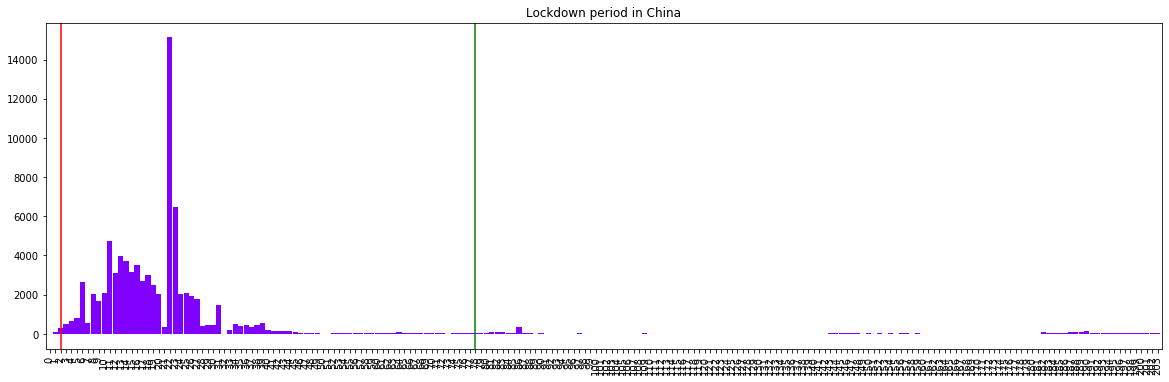

In [84]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Lockdown period in China',colormap='rainbow')
plt.axvline (x = 2, color = 'r')
plt.axvline (x = 78, color = 'g')
plt.show()

**China's Lockdown : China imposed lockdown of all total 76 days and as a result the confirmed cases incrementation is nullified and turned out at a negligible rate. So definitely we can say that China imposed the lockdown in a correct manner as a result they had prevented the coronavirus spread**

## Italy's lockdown Period - SUCCESSFUL

**Italy imposed lockdown on 9th March, 2020**

**Italy revoked lockdown on 18th May, 2020**

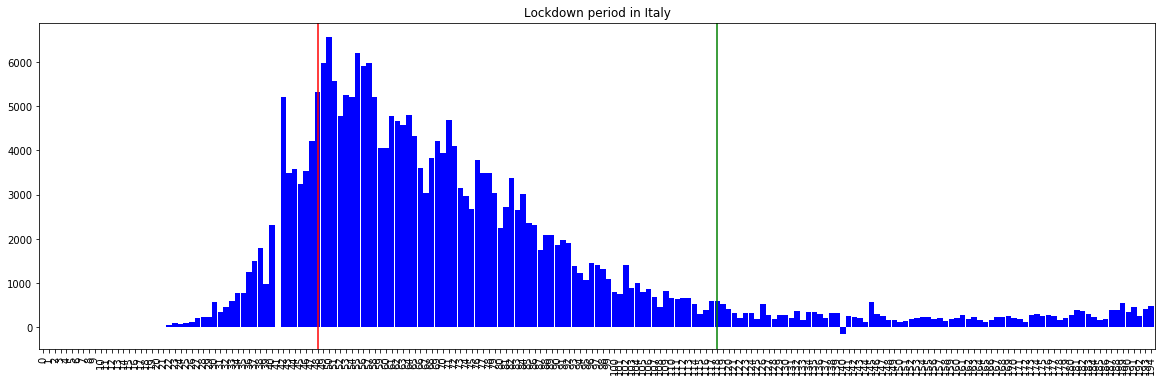

In [85]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Lockdown period in Italy',colormap = 'winter')
plt.axvline (x=48, color = 'r')
plt.axvline (x=118, color = 'g')
plt.show()

**Italy's Lockdown : Due to rapid increase of corona virus spread in Italy, the government imposed lockdown on 9th March, 2020 and the lockdown elongated to 70 days as a result the increment in the confirmed cases were decreased from 6000 per day to 500 per day (approx.). Which signifies that Italy has prevented the spread out of the virus by imposing the lockdown, and we can clearly observe that the LOCKDOWN IS SUCCESSFUL FOR ITALY!**

## United States of America Lockdown Period - UNSUCCESSFUL

**USA imposed lockdown on 19th March, 2020**

**USA revoked lockdown on 13th June, 2020**

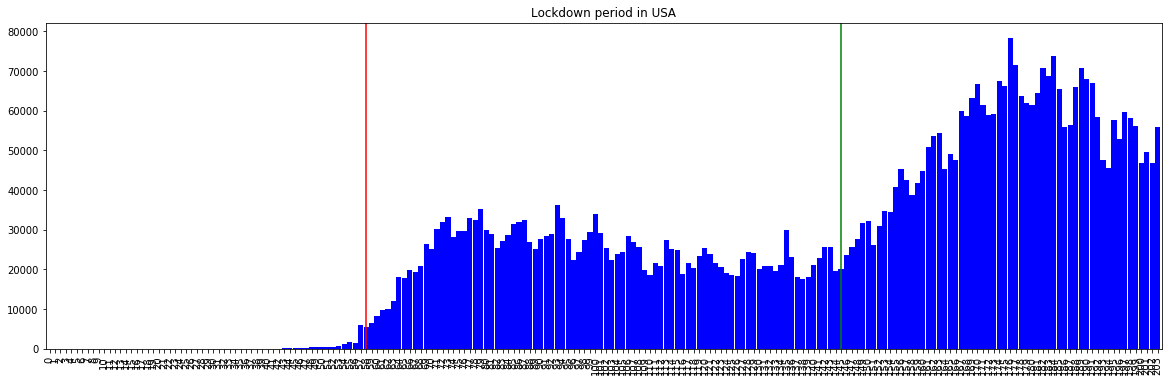

In [86]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in USA')
plt.axvline (x = 58, color = 'r')
plt.axvline (x= 145, color = 'g')
plt.show()

**USA's Lockdown : United States of America imposed lockdown on 19th March, 2020 when they were at the initial stage and the cases were 10000. After the lockdown implementation the cases were raised to 40000 daily and it was continued 87 days but the daily cases were not increased beyond 40000. At this moment Donald Trump decided to open USA and re-open the economy as they faced a decrement of 4.5% GDP, and this will cost the country hugely if the economy is not opened yet. As the lockdown revoked on 13th June, 2020, the cases are drastically increasing and creating a new record every day. As we can see that after the revokation of lockdown the condition became worser for USA. They have seen 80000 cases daily, and the tally is still increasing. Unfortunately, for USA the lockdown period is successful to some extent and to prevent the daily exponential increment but on the same side, it did not make the curve downward or even flattened. The lockdown in case of USA IS UNSUCCESSFUL!**

## Germany Lockdown Period - SUCCESSFUL

#### Germany imposed lockdown on 23rd March, 2020

#### Germany revoked lockdown on 10th May, 2020

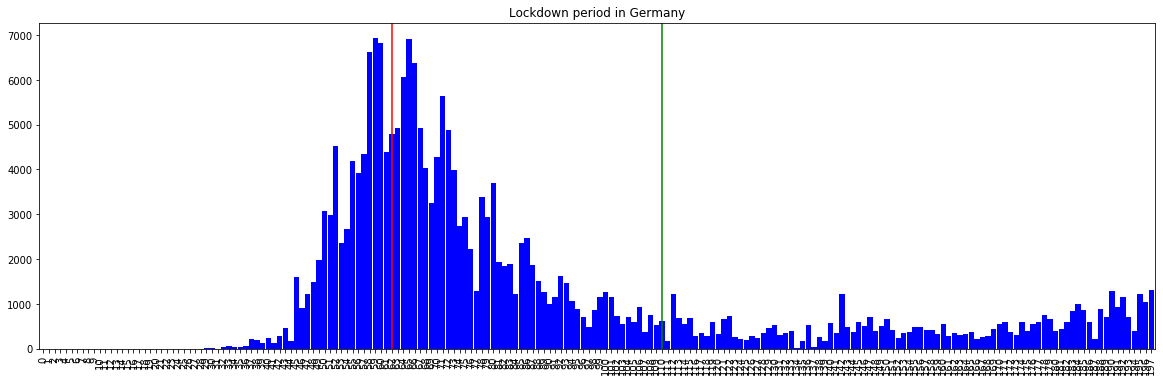

In [87]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in Germany')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 110, color= 'g')
plt.show()

**Germany Lockdown : The government of Germany imposed lockdown from 23rd March, 2020 when the country is facing high rise in the per day confirmed case rate. They faced merely 7000 cases per day at the time of lockdown. After the lockdown was imposed, the daily new confirmed cases are slowly decreased within  a month to 2000 cases per day. Which shows that the lockdown action is successful for the country and the health sectors. At this on 10th May, 2020 they have revoked lockdown to re-open the country and economy. Still the cases are coming on a day to day basis but they are in a certain numbers around 1000. And also the death rate is also come down to 20 odd numbers. Which shows GERMANY SUCCESSFULLY IMPOSED LOCKDOWN AND PREVENTED THE BREAK THROUGH OF THE VIRUS**

## AUSTRALIA Lockdown - SUCCESSFUL to some extent

#### Australia imposed national lockdown on 23rd March, 2020

#### Australia eased the lockdown on 8th July, 2020

#### Australia again imposed the lockdown on 7th August, 2020 due to increment in the daily cases

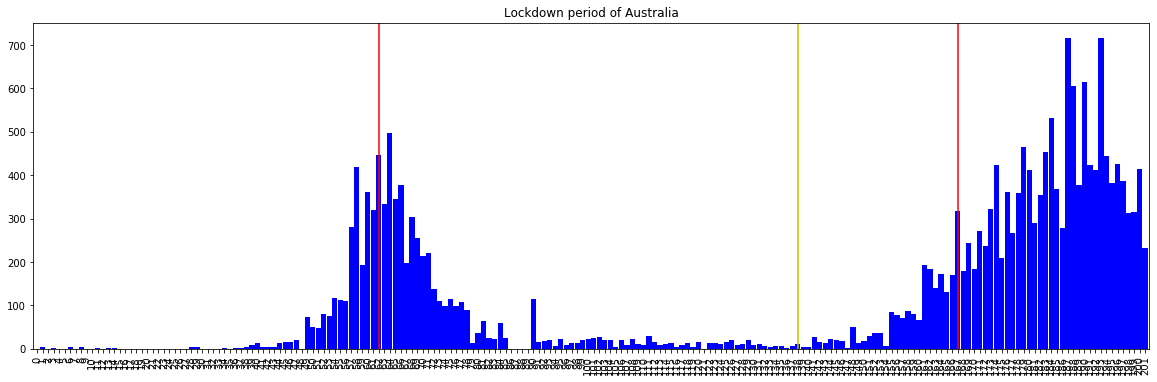

In [88]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Australia')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 138, color = 'y')
plt.axvline (x=167, color = 'r')
plt.show()

**Australia Lockdown : The government imposed lockdown on 23rd March, when the country was facing the high rise in the daily confirmed cases. After imposing the lockdown properly, the country stabilized the situation and the controlled the daily cases down to 100. At that moment the government declared that some areas will be eased from the lockdown and as a result they again saw the increment in the daily confirmed cases rapidly. At this the government imposed lockdown on 7th August, 2020 to prevent the cases. This time the cases were doubled up than the previous high rises. We can say that, AUSTRALIA SUCCESSFULLY CONTROLLED THE SPREAD OF THE VIRUS IN THE LOCKDOWN PERIOD, BUT WHENEVER THEY OPENED UP, IT BECAME WORSER FOR THEM** 

## JAPAN Lockdown Period - SUCCESSFUL to some extent

#### Japan imposed lockdown on 7th April, 2020

#### Japan revoked lockdown on 31st May, 2020

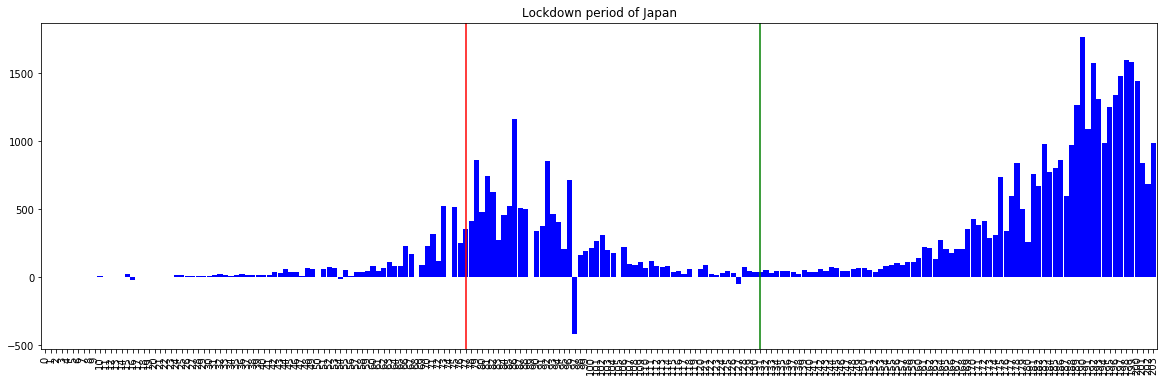

In [89]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Japan')
plt.axvline (x = 77, color = 'r')
plt.axvline (x = 131, color = 'g')
plt.show()

**Japan Lockdown : On the situation of increasing confirmed cases the Japan government imposed lockdown on 7th April, and they successfully controlled the cases. But the worser days were yet to come for Japan. As the lockdown was revoked the cases were slowly increasing and in a few days the cases were increasing exponentially. The daily confirmed cases are raised to 1500. And the tally is still growing. But Japan was not imposing lockdown, rather they had started rigorous testing to prevent the virus. we can say that, JAPAN IS SUCCESSFUL IN THE EARLY LOCKDOWN PERIOD AND RIGHT NOW THEY HAVE INCREASED THE TESTING TO PREVENT THE VIRUS**  

# INDIA - The Fastest growing epicentre

**Observing the cases in India. Confirmed cases are increasing in India each day. There is a need to get a flatter curve for confirmed cases which currently is in upswing with a steep increase since past few days.**

### Per Day Statistics for India till 12th August, 2020

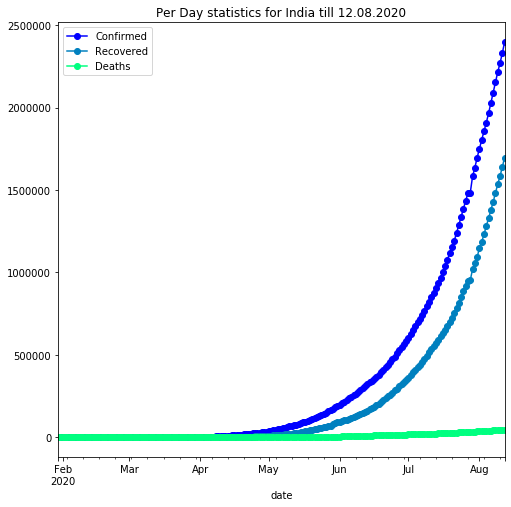

In [90]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India till 12.08.2020',marker='o')
num_plot_india=num_plot.reset_index()

### Cases reported in the recent times in India

In [91]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
#num_plot_india['Confirmed'][132]=287154
#num_plot_india['Recovered'][132]=140928
#num_plot_india['Deaths'][132]=8106
#num_plot_india['Confirmed'][134]=309595
#num_plot_india['Recovered'][134]=154235
#num_plot_india['Deaths'][134]=8888
#num_plot_india['Confirmed'][135]=321634
#num_plot_india['Recovered'][135]=162327
#num_plot_india['Deaths'][135]=9197
#num_plot_india['Confirmed'][136]=333039
#num_plot_india['Recovered'][136]=153792
#num_plot_india['Deaths'][136]=9521
#num_plot_india['Confirmed'][137]=343071
#num_plot_india['Recovered'][137]=180324
#num_plot_india['Deaths'][137]=9917
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

date  Confirmed  Recovered  Deaths  Confirmed Case Increase  \
186 2020-08-03    1855745    1230509   38938                    52050   
187 2020-08-04    1908254    1282215   39795                    52509   
188 2020-08-05    1964536    1328336   40699                    56282   
189 2020-08-06    2027074    1378105   41585                    62538   
190 2020-08-07    2088611    1427005   42518                    61537   
191 2020-08-08    2153010    1480884   43379                    64399   
192 2020-08-09    2215074    1535743   44386                    62064   
193 2020-08-10    2268675    1583489   45257                    53601   
194 2020-08-11    2329638    1639599   46091                    60963   
195 2020-08-12    2396637    1695982   47033                    66999   

     Death Case Increase  
186                  803  
187                  857  
188                  904  
189                  886  
190                  933  
191                  861  
192                 1007  
193                  871  
194                  834  
195                  942

**8th August has recorded highest number of COVID19 confirmed cases in India in a day (64399). In the last few days the peak in cases have been increasing almost everyday. Note: We are not considering the stats on 28th and 29th July because it seems to be incorrect.**

### Confirmed cases increased in India till 12th August, 2020 

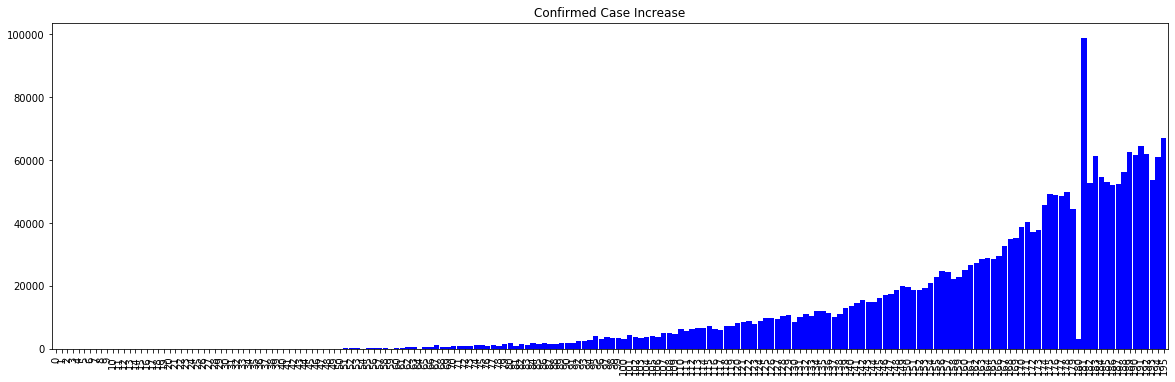

In [92]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()

**The day to day confirmed cases are increasing exponentially and everyday India is creating a new record on the per day confirmed cases**

### Death cases increased in India till 12th August, 2020

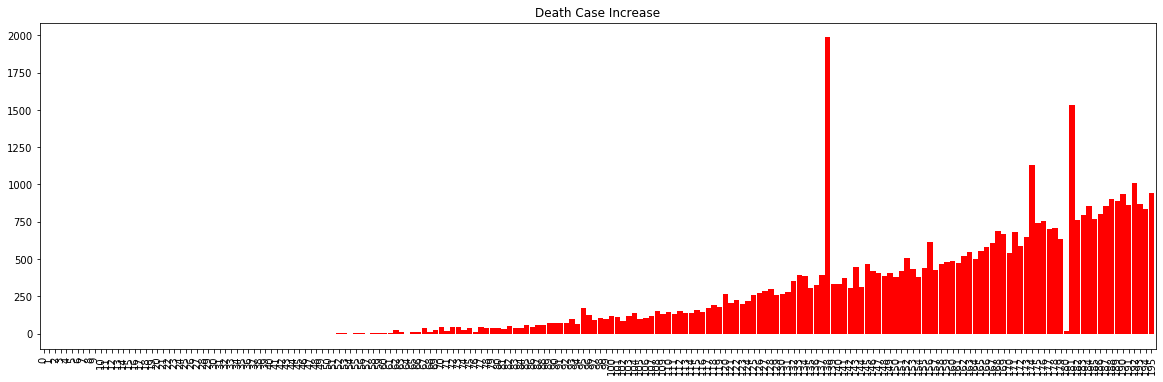

In [93]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Death Case Increase')
plt.show()

**As the day to day confirmed cases are increasing exponentially thedeath cases are also increasing in the exponential manner with a rate of min 1000 people per day. The highest peak have obtained of 2000 people have died in a day. And the number is increasing daily**

### Total no. of confimed cases in India till 12th August, 2020

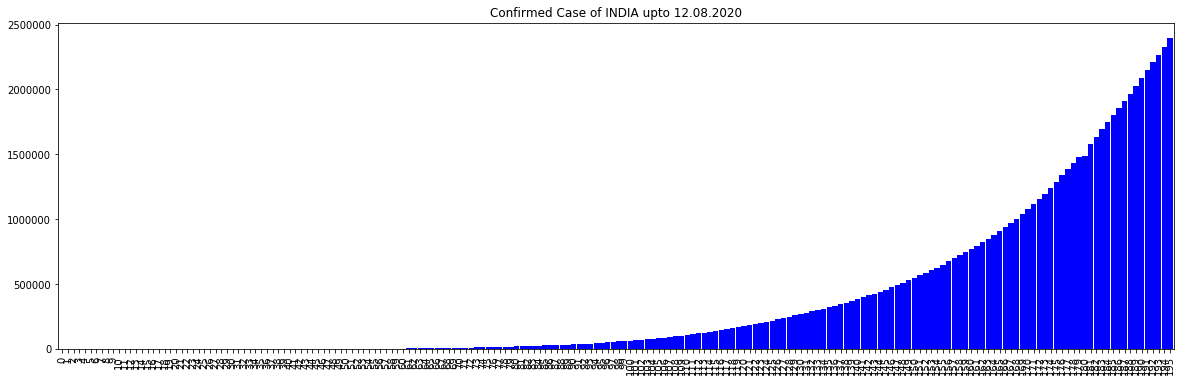

In [94]:
num_plot_india['Confirmed'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case of INDIA upto 12.08.2020')
plt.show()

### Total no. of Recovered cases in India till 12th August, 2020

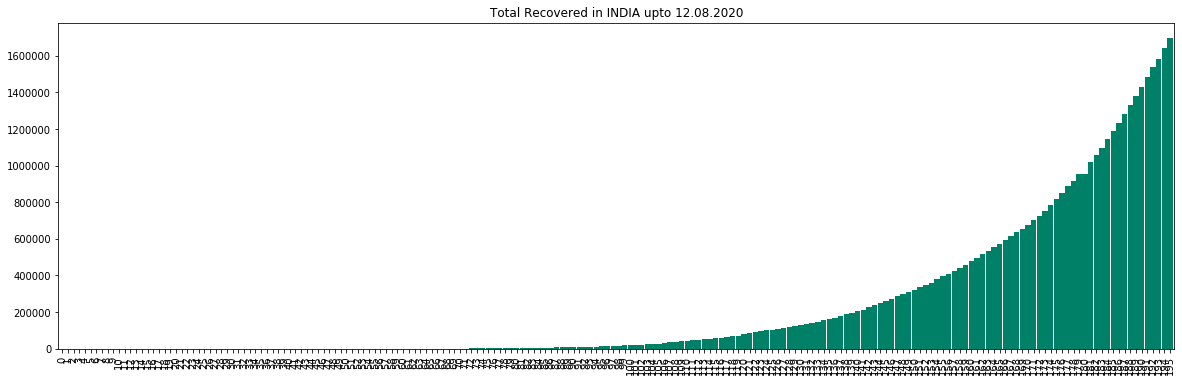

In [95]:
num_plot_india['Recovered'].plot(kind='bar',width=0.95,colormap='summer',figsize=(20,6),title='Total Recovered in INDIA upto 12.08.2020')
plt.show()

### Total no. of Death cases in India till 12th August, 2020

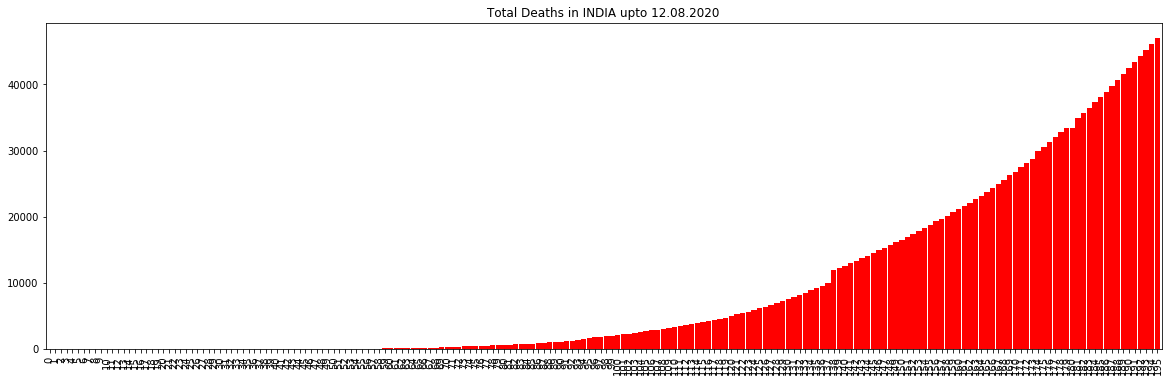

In [96]:
num_plot_india['Deaths'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Total Deaths in INDIA upto 12.08.2020')
plt.show()

**In the current situation of pandemic the confirmed cases are creating new record daily as well as the death cases. The death toll rises upto 50000 still it is not flattening anymore. Not a single chance of flattening has seen in the curve rather the growth rate is exponentially. India is yet to have the worst situation like United States are having** 

## INDIA LOCKDOWN PERIOD - UNSUCCESSFUL 

### India imposed lockdown on 23rd March, 2020

### India revoked lockdown on 30th June, 2020

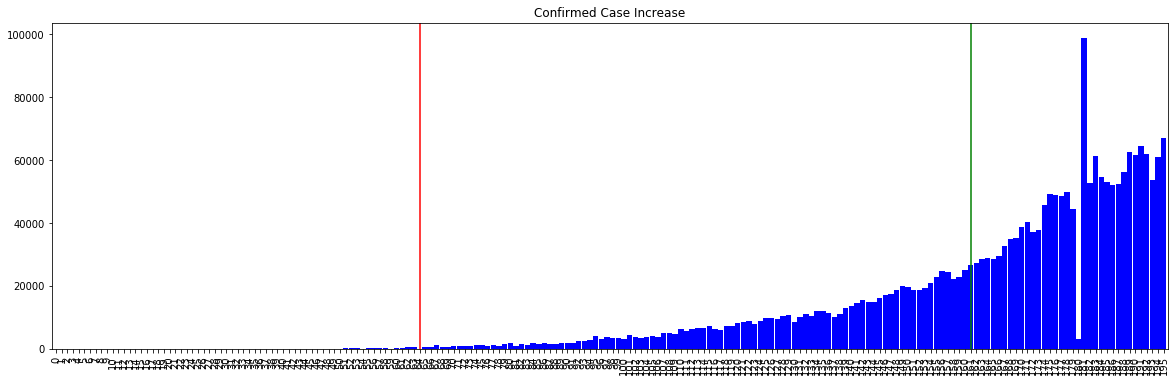

In [97]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.axvline (x=64, color = 'r')
plt.axvline (x= 161, color = 'g')
plt.show()

**India Lockdown : After watching the world suffering from the virus, India has take precaution earlier and imposed lockdown on 23rd march, 2020. After that the cases were increasing in a daily basis and exponentially, and the toll reached to 40000 mark. At that time the government decided to revoke the lockdown. As a result the cases were raised to 2500000 (As of the data of 12th August, 2020). India is having the worst condition in the world. The cases are increasing 60000 daily. There is no sign of flattening the curve rather it is exponentially increasing and the curve is obtaining more and more steep slope day by day. INDIA, IN THE PERSPECTIVE OF LOCKDOWN WAS TOTALLY UNSUCCESSFUL, AND BECAME 3RD HIGHEST INFECTED COUNTRY IN THE WORLD**  

# STATE-WISE ANALYSIS OF INDIA

In [98]:
import requests

In [99]:
import io

In [100]:
age_group = pd.read_csv('AgeGroupDetails.csv')
india_covid = pd.read_csv('covid_19_india.csv')
india_covid.to_csv('india_cases.csv',date_format='%Y-%m-%d')
india_covid_19=pd.read_csv('india_cases.csv')
#india_covid_19 = pd.read_csv('../input/statewisetestingdetailsindiacsv/covid_19_india.csv',sep=',')
hospital_beds = pd.read_csv('HospitalBedsIndia.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
#ICMR_details = pd.read_csv('../input/covid19-in-india/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('ICMRTestingLabs.csv')
state_testing = pd.read_csv('statewise_tested_numbers_data.csv')

In [101]:
india_covid_19.tail()

Unnamed: 0   Sno      Date     Time State/UnionTerritory  \
5331        5331  5332  18/08/20  8:00 AM            Telengana   
5332        5332  5333  18/08/20  8:00 AM              Tripura   
5333        5333  5334  18/08/20  8:00 AM          Uttarakhand   
5334        5334  5335  18/08/20  8:00 AM        Uttar Pradesh   
5335        5335  5336  18/08/20  8:00 AM          West Bengal   

     ConfirmedIndianNational ConfirmedForeignNational   Cured  Deaths  \
5331                       -                        -   72202     711   
5332                       -                        -    5404      62   
5333                       -                        -    8485     158   
5334                       -                        -  104808    2515   
5335                       -                        -   89703    2473   

      Confirmed  
5331      93937  
5332       7409  
5333      12493  
5334     158216  
5335     119578

In [102]:
india_covid_19.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)
unassigned=india_covid_19[india_covid_19['State']=='Unassigned'].index
india_covid_19.drop(unassigned,axis=0,inplace=True)
unassigned1=india_covid_19[india_covid_19['State']=='Nagaland#'].index
india_covid_19.drop(unassigned1,axis=0,inplace=True)
unassigned2=india_covid_19[india_covid_19['State']=='Jharkhand#'].index
india_covid_19.drop(unassigned2,axis=0,inplace=True)
unassigned3=india_covid_19[india_covid_19['State']=='Madhya Pradesh#'].index
india_covid_19.drop(unassigned3,axis=0,inplace=True)
unassigned4=india_covid_19[india_covid_19['State']=='Cases being reassigned to states'].index
india_covid_19.drop(unassigned4,axis=0,inplace=True)
unassigned5=india_covid_19[india_covid_19['State']=='Telengana***'].index
india_covid_19.drop(unassigned5,axis=0,inplace=True)
unassigned6=india_covid_19[india_covid_19['State']=='Telangana***'].index
india_covid_19.drop(unassigned6,axis=0,inplace=True)
unassigned7=india_covid_19[india_covid_19['State']=='Telangana'].index
india_covid_19.drop(unassigned7,axis=0,inplace=True)

## Visualizing the State-wise Confirmed Cases till 18th August, 2020

In [103]:
import plotly.express as px
statewise_cases = pd.DataFrame(india_covid_19.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" 
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',color='Confirmed', hover_data=['State'])
fig.show()

### Most affected state - MAHARASHTRA

## Male or, Female - Which community is more effected?

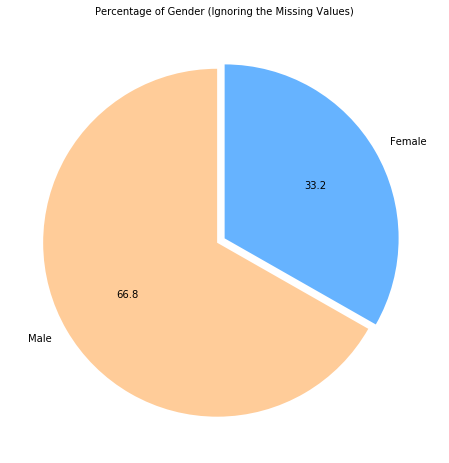

In [104]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode = (0.05, 0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

#### We can see that out of total confirmed cases Males are more affected than the Females

## WHICH AGE GROUP IS MORE EFFECTED IN INDIA ?

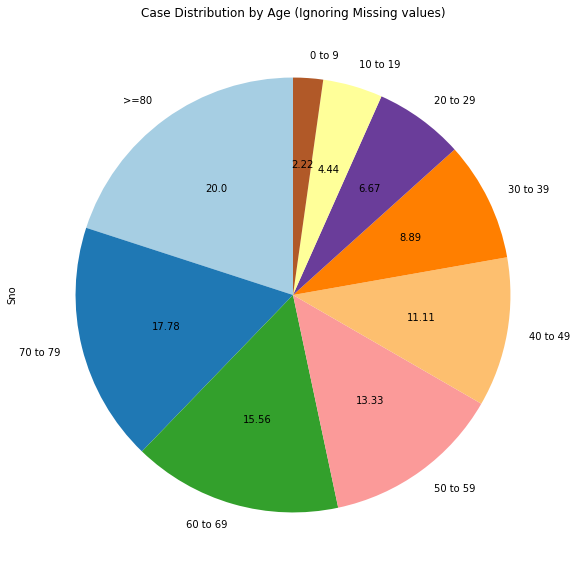

In [105]:
fig = plt.figure(figsize=(10,10))
age_group=age_group.iloc[0:9,:]
age_dist_india = age_group.groupby('AgeGroup')['Sno'].sum().sort_values(ascending=False)
def absolute_value(val):
    a  = val
    return (np.round(a,2))
age_dist_india.plot(kind="pie",title='Case Distribution by Age (Ignoring Missing values)',autopct=absolute_value,colormap='Paired',startangle=90)

plt.show ()

### The endangered Age-Groups are 60 to 69, 70 to 79 and the people having age greater than 80

## Statewise Table - Recovery rate and Death rate

In [106]:
india_covid_19['Deaths']=india_covid_19['Deaths'].replace(['0#','NaN'],0)
india_covid_19['Deaths']=india_covid_19['Deaths'].astype('int')

In [147]:
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Recovered'], index='State', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Recovered'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Purples')

### MAHARASHTRA is having the most Confirmed cases, Recovery cases and Death cases

### DELHI is having the highest Recovery rate

### GUJARAT is having highest Death rate

## State-wise Testing done for Covid-19

In [108]:
testing=state_testing.groupby('State')['Total Tested'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="Total Tested",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

## Total Tested v/s Positive Cases : State-wise Analysis

In [146]:
state_testing=state_testing.fillna(0)
state_test_details = pd.pivot_table(state_testing, values=['Total Tested','Positive','Negative'], index='State', aggfunc='max')
state_test_details['Positive Test Rate'] = round(state_test_details['Positive'] / state_test_details['Total Tested'],2)
#state_test_details['Negative Test Rate'] = round(state_test_details['Negative'] /state_test_details['Total Tested'])
state_test_details = state_test_details.sort_values(by='Total Tested', ascending= False)
state_test_details.style.background_gradient(cmap='Blues')

## State v/s Testing Labs : State-wise Analysis

In [110]:
values = list(ICMR_labs['state'].value_counts())
states = list(ICMR_labs['state'].value_counts().index)
labs = pd.DataFrame(list(zip(values, states)), 
               columns =['values', 'states'])
fig = px.bar(labs, 
             x="values",
             y="states", 
             orientation='h',
             height=1000,
             title='Statewise Labs',
            color='states')
fig.show()

## Health Facility Condition wise Analysis

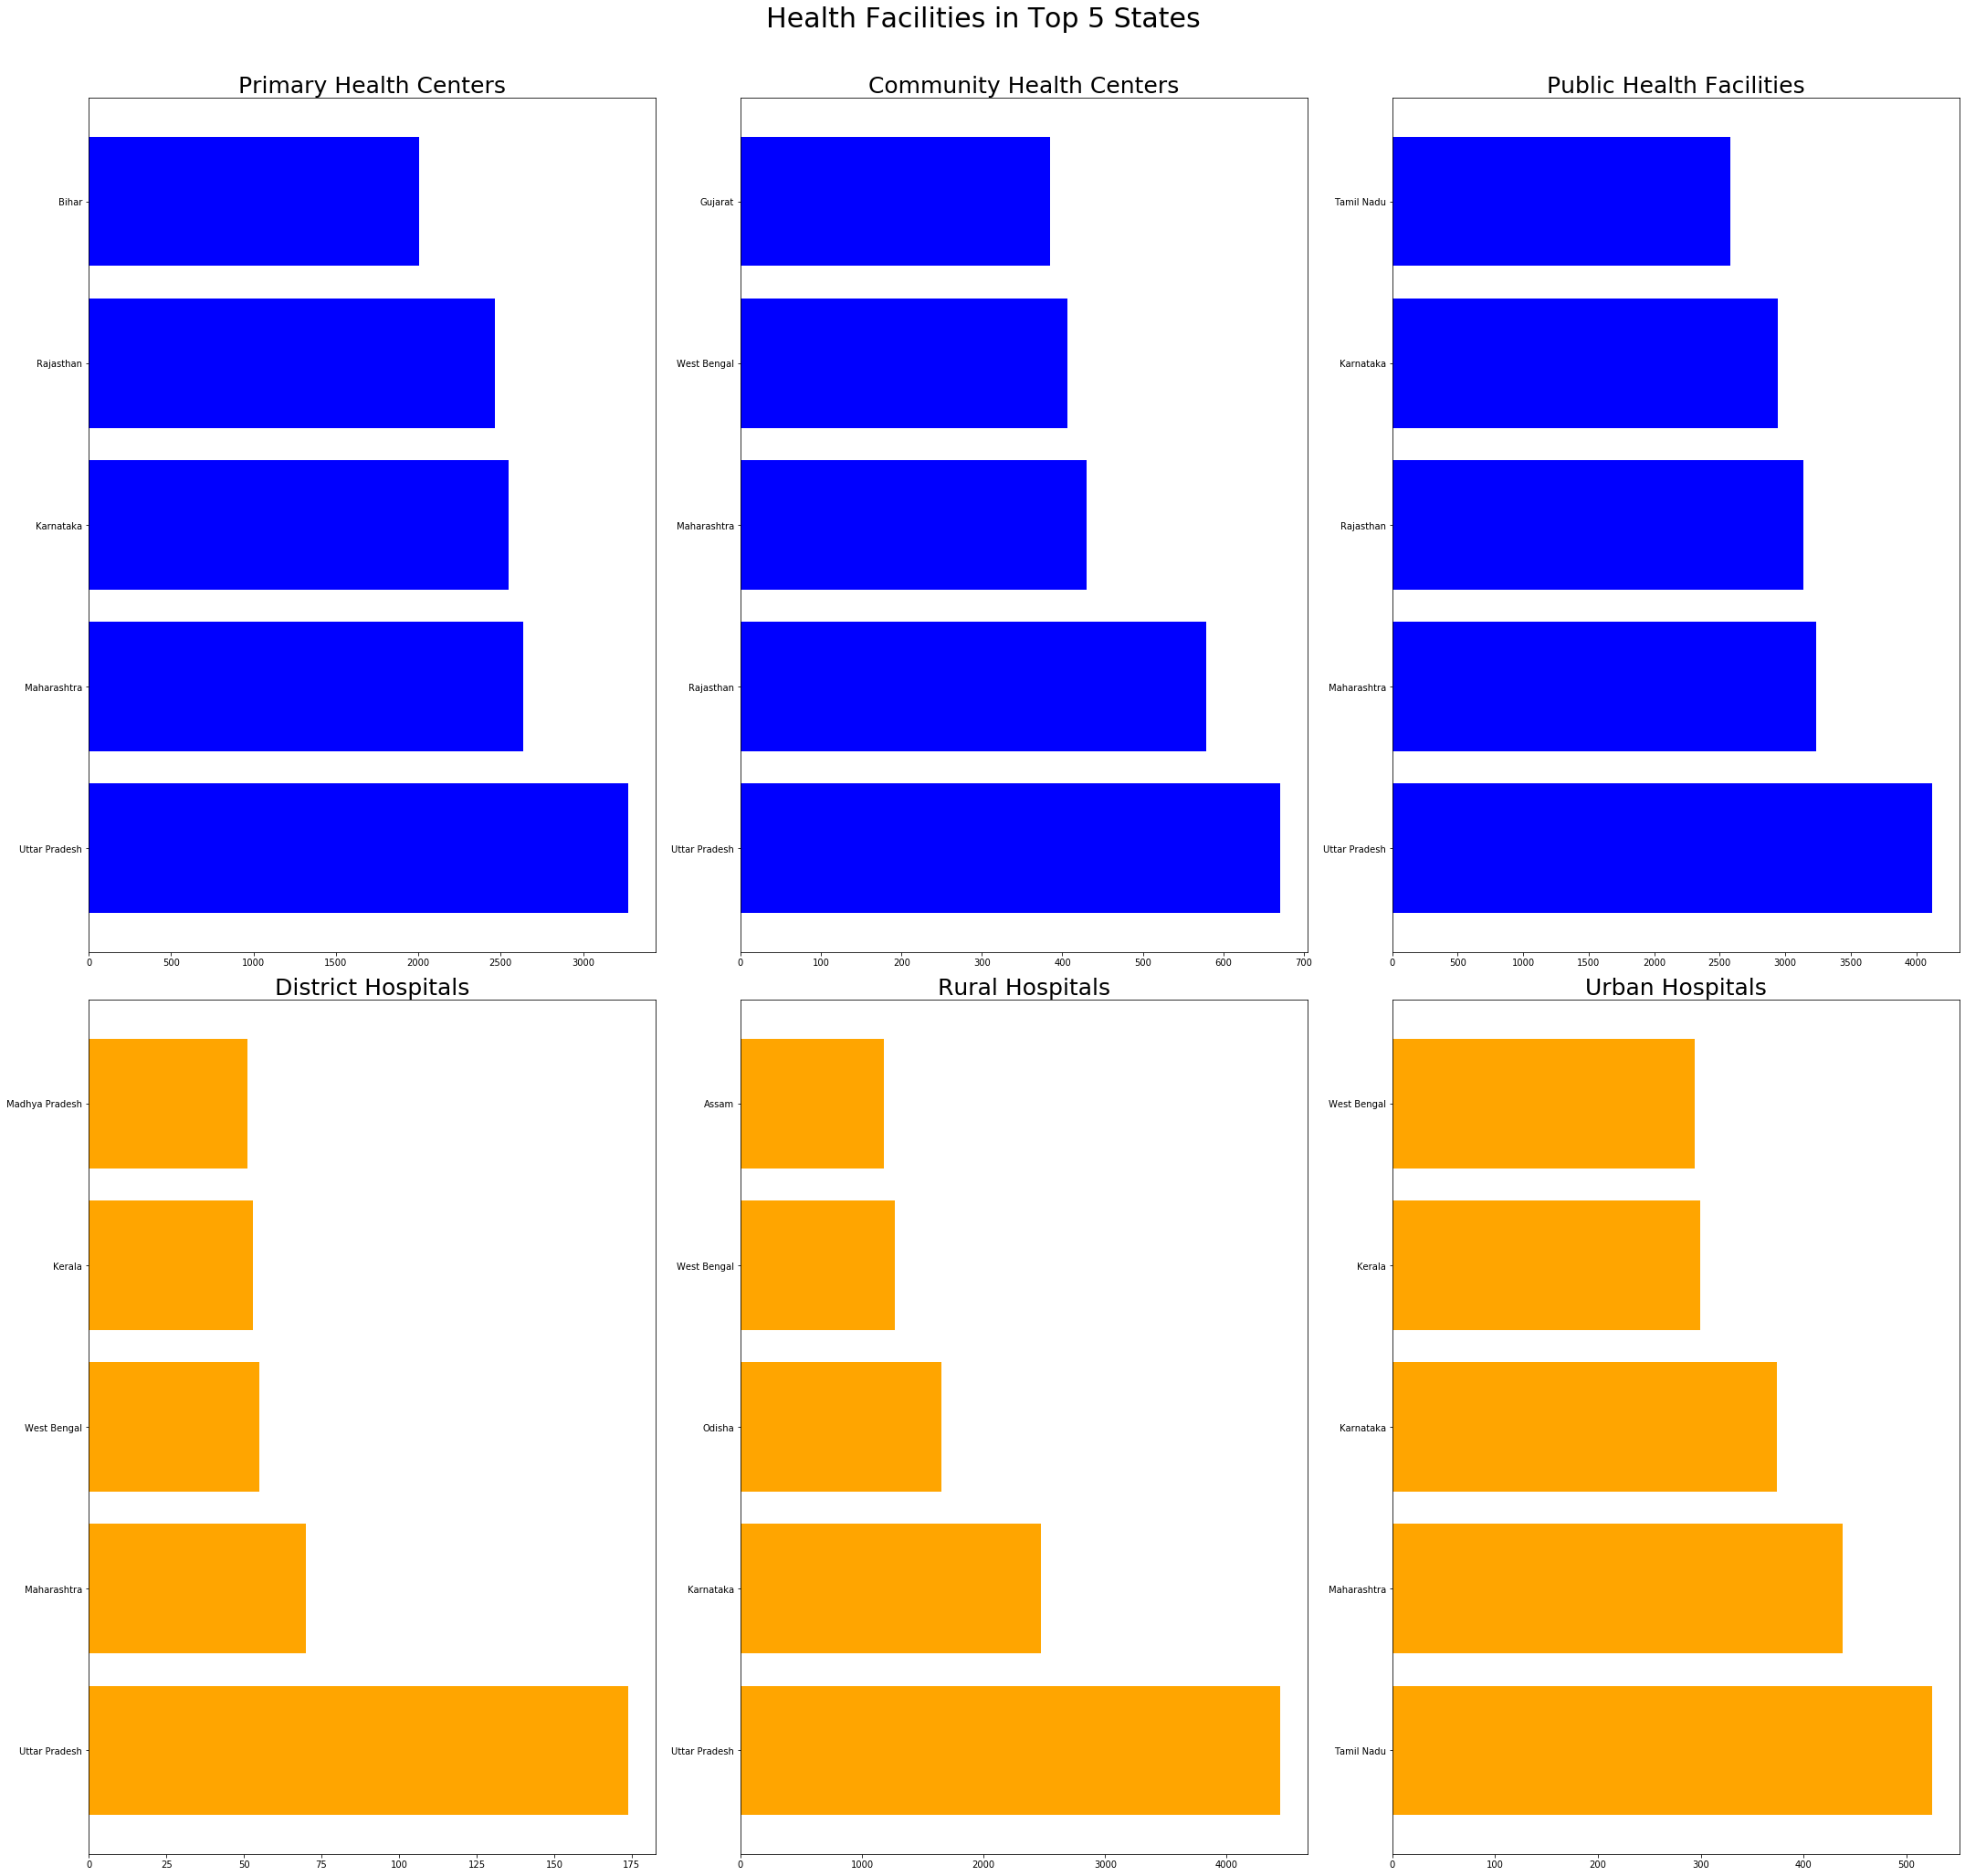

In [111]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
hospital_beds_states =hospital_beds.drop([36])
cols_object = list(hospital_beds_states.columns[2:8])
for cols in cols_object:
    hospital_beds_states[cols] = hospital_beds_states[cols].astype(int,errors = 'ignore')
top_5_primary = hospital_beds_states.nlargest(5,'NumPrimaryHealthCenters_HMIS')
top_5_community = hospital_beds_states.nlargest(5,'NumCommunityHealthCenters_HMIS')
top_5_district_hospitals = hospital_beds_states.nlargest(5,'NumDistrictHospitals_HMIS')
top_5_public_facility = hospital_beds_states.nlargest(5,'TotalPublicHealthFacilities_HMIS')
top_5_public_beds = hospital_beds_states.nlargest(5,'NumPublicBeds_HMIS')
top_rural_hos = hospital_beds_states.nlargest(5,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds_states.nlargest(5,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds_states.nlargest(5,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds_states.nlargest(5,'NumUrbanBeds_NHP18')

plt.figure(figsize=(30,30))
plt.suptitle('Health Facilities in Top 5 States',fontsize=30)
plt.subplot(231)
plt.title('Primary Health Centers',fontsize=25)
plt.barh(top_5_primary['State/UT'],top_5_primary['NumPrimaryHealthCenters_HMIS'],color ='blue');

plt.subplot(232)
plt.title('Community Health Centers',fontsize=25)
plt.barh(top_5_community['State/UT'],top_5_community['NumCommunityHealthCenters_HMIS'],color = 'blue');

plt.subplot(233)
plt.title('Public Health Facilities',fontsize=25)
plt.barh(top_5_public_facility['State/UT'],top_5_public_facility['TotalPublicHealthFacilities_HMIS'],color='blue');

plt.subplot(234)
plt.title('District Hospitals',fontsize=25)
plt.barh(top_5_district_hospitals['State/UT'],top_5_district_hospitals['NumDistrictHospitals_HMIS'],color = 'orange');

plt.subplot(235)
plt.title('Rural Hospitals',fontsize=25)
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = 'orange');
plt.subplot(236)
plt.title('Urban Hospitals',fontsize=25)
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = 'orange');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## State v/s Hospital Beds : State-wise Analysis

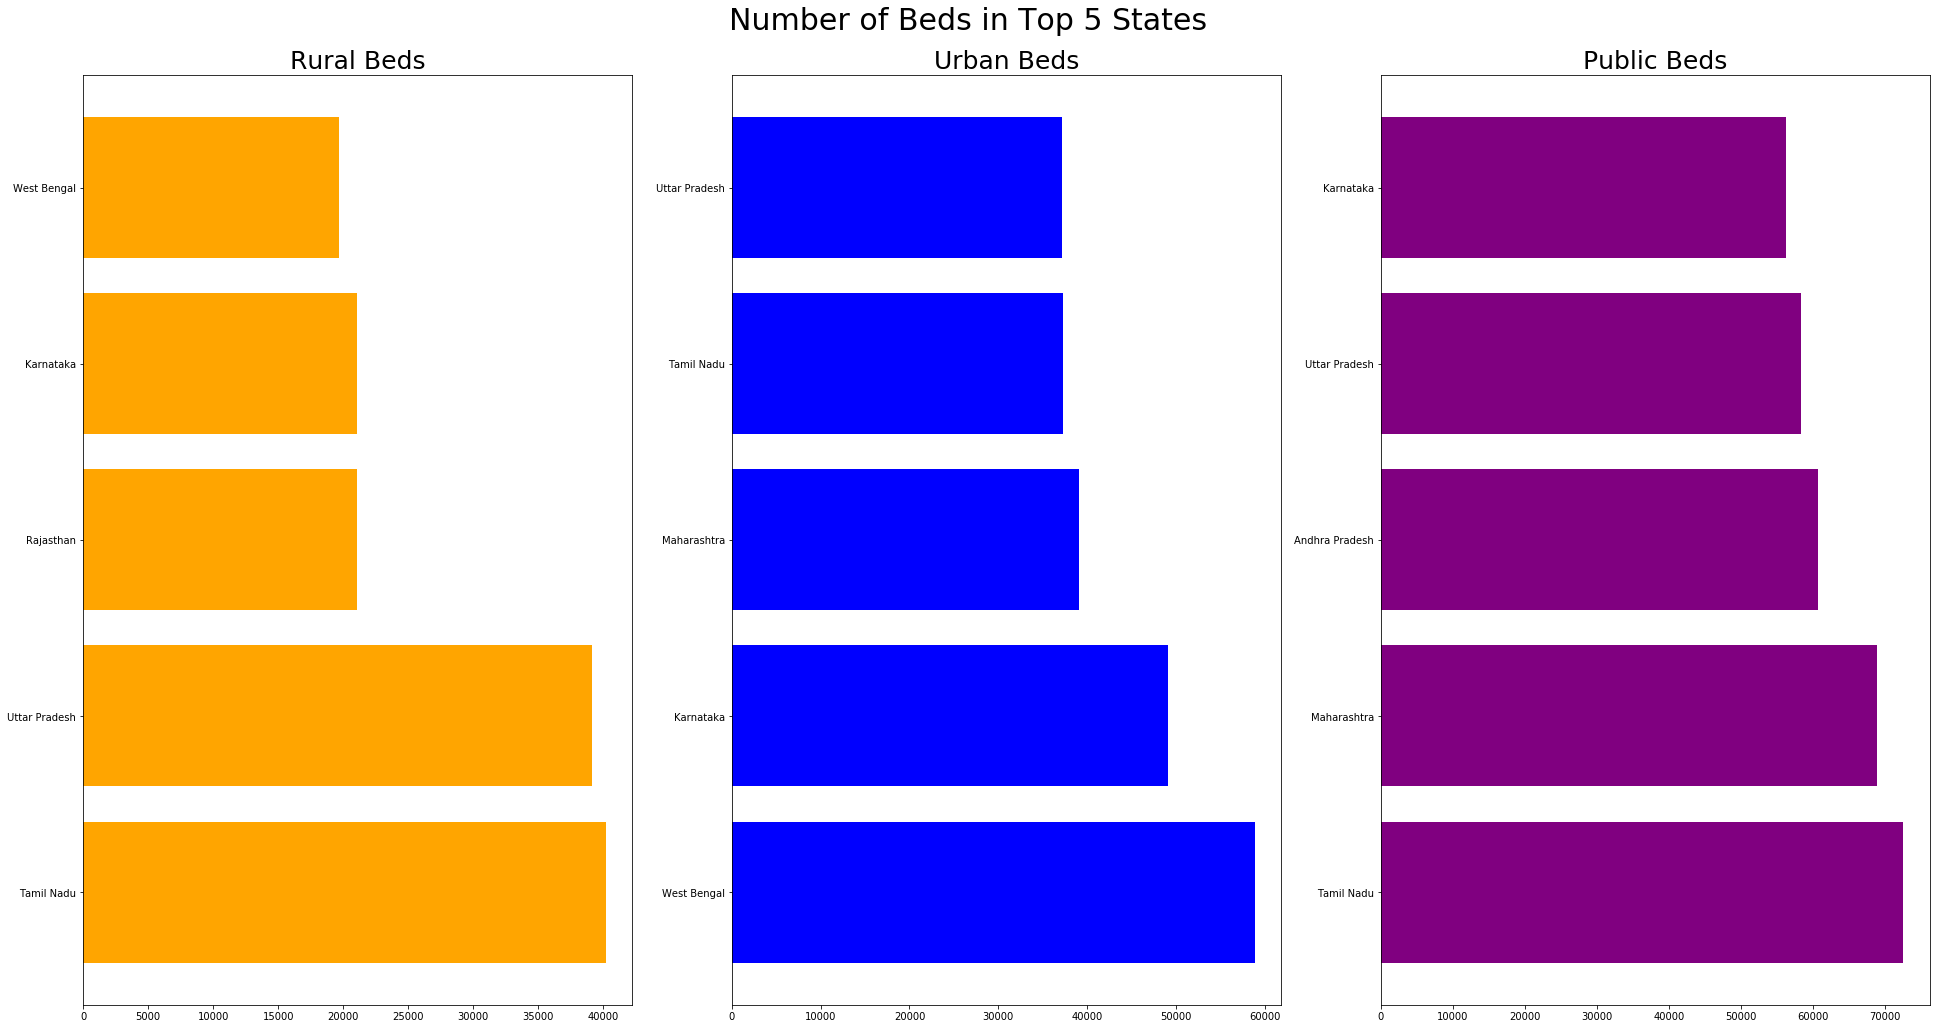

In [112]:
plt.figure(figsize=(27,15))
plt.suptitle('Number of Beds in Top 5 States',fontsize=30);
plt.subplot(131)
plt.title('Rural Beds',fontsize=25)
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = 'orange');

plt.subplot(132)
plt.title('Urban Beds',fontsize=25)
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = 'blue');
plt.subplot(133)
plt.title('Public Beds',fontsize=25)
plt.barh(top_5_public_beds['State/UT'],top_5_public_beds['NumPublicBeds_HMIS'],color = 'purple');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# PREDICTION FOR INDIA

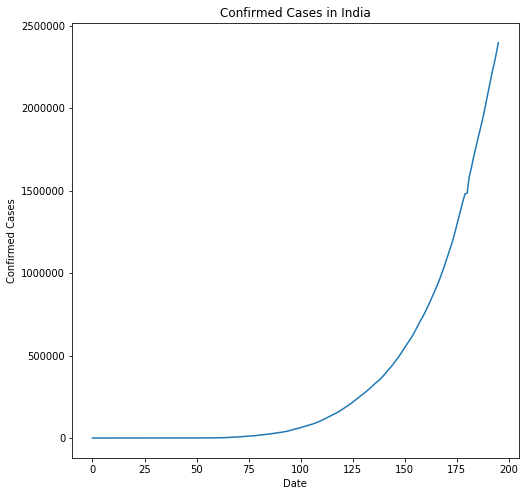

In [113]:
ax = num_plot_india['Confirmed'].plot(title="Confirmed Cases in India",figsize=(8,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [114]:
train = num_plot_india.iloc[:-3,:2]
test = num_plot_india.iloc[-3:,:2]

In [115]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [116]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18','2020-07-08','2020-07-28'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Prediction for India in the upcoming days based on the current situation

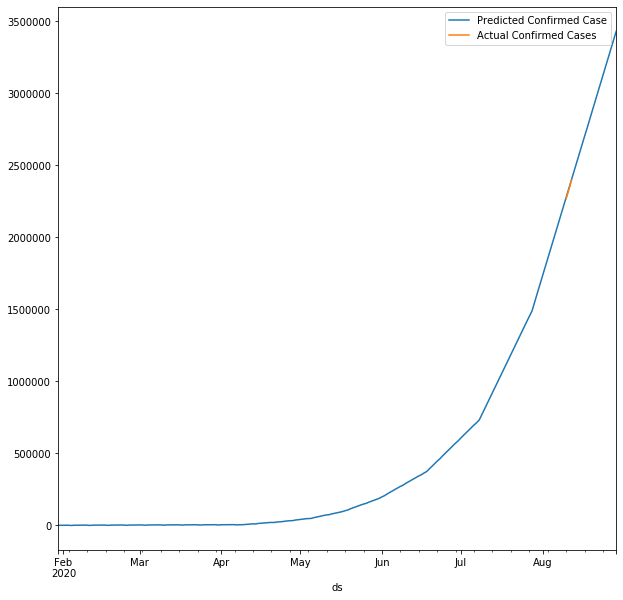

In [117]:
future_dates = model.make_future_dataframe(periods=20)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

### Prediction of the Growth Rate of the Confirmed Cases

In [118]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='90 days', period='40 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-18 00:00:00 and 2020-08-06 00:00:00


horizon           mse         rmse          mae      mape     mdape  \
0  1 days  6.620931e+07  8136.910614  7359.750727  0.017869  0.011044   
1  2 days  6.161095e+07  7849.264148  7696.690395  0.022929  0.014574   
2  3 days  8.170745e+07  9039.217151  8974.870891  0.029101  0.017721   

   coverage  
0  0.333333  
1  0.333333  
2  0.333333

In [119]:
forecast.tail(15)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
198 2020-08-15  2.580620e+06  2.565001e+06  2.596092e+06  2.578564e+06   
199 2020-08-16  2.641305e+06  2.624812e+06  2.659701e+06  2.635501e+06   
200 2020-08-17  2.701990e+06  2.684220e+06  2.720069e+06  2.692401e+06   
201 2020-08-18  2.762674e+06  2.742182e+06  2.781515e+06  2.749689e+06   
202 2020-08-19  2.823359e+06  2.802577e+06  2.847598e+06  2.804540e+06   
203 2020-08-20  2.884043e+06  2.857011e+06  2.913854e+06  2.857982e+06   
204 2020-08-21  2.944728e+06  2.912914e+06  2.977931e+06  2.912123e+06   
205 2020-08-22  3.005413e+06  2.964240e+06  3.045366e+06  2.966627e+06   
206 2020-08-23  3.066097e+06  3.022132e+06  3.112629e+06  3.019019e+06   
207 2020-08-24  3.126782e+06  3.075527e+06  3.183567e+06  3.071794e+06   
208 2020-08-25  3.187466e+06  3.127106e+06  3.249629e+06  3.127035e+06   
209 2020-08-26  3.248151e+06  3.181072e+06  3.317880e+06  3.180064e+06   
210 2020-08-27  3.308836e+06  3.233020e+06  3.390511e+06  3.234634e+06   
211 2020-08-28  3.369520e+06  3.286325e+06  3.453343e+06  3.288005e+06   
212 2020-08-29  3.430205e+06  3.339136e+06  3.522514e+06  3.341084e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
198  2.584405e+06      416.478036            416.478036            416.478036   
199  2.647085e+06      771.676470            771.676470            771.676470   
200  2.710775e+06      261.877084            261.877084            261.877084   
201  2.776220e+06    -1592.695941          -1592.695941          -1592.695941   
202  2.841984e+06       72.695972             72.695972             72.695972   
203  2.910378e+06        2.009516              2.009516              2.009516   
204  2.977991e+06       67.958863             67.958863             67.958863   
205  3.043906e+06      416.478036            416.478036            416.478036   
206  3.112388e+06      771.676470            771.676470            771.676470   
207  3.181838e+06      261.877084            261.877084            261.877084   
208  3.250836e+06    -1592.695941          -1592.695941          -1592.695941   
209  3.317547e+06       72.695972             72.695972             72.695972   
210  3.385514e+06        2.009516              2.009516              2.009516   
211  3.453228e+06       67.958863             67.958863             67.958863   
212  3.522591e+06      416.478036            416.478036            416.478036   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
198   416.478036    416.478036    416.478036                   0.0   
199   771.676470    771.676470    771.676470                   0.0   
200   261.877084    261.877084    261.877084                   0.0   
201 -1592.695941  -1592.695941  -1592.695941                   0.0   
202    72.695972     72.695972     72.695972                   0.0   
203     2.009516      2.009516      2.009516                   0.0   
204    67.958863     67.958863     67.958863                   0.0   
205   416.478036    416.478036    416.478036                   0.0   
206   771.676470    771.676470    771.676470                   0.0   
207   261.877084    261.877084    261.877084                   0.0   
208 -1592.695941  -1592.695941  -1592.695941                   0.0   
209    72.695972     72.695972     72.695972                   0.0   
210     2.009516      2.009516      2.009516                   0.0   
211    67.958863     67.958863     67.958863                   0.0   
212   416.478036    416.478036    416.478036                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
198                         0.0                         0.0  2.581037e+06  
199                         0.0                         0.0  2.642077e+06  
200                         0.0                         0.0  2.702252e+06  
201                         0.0                         0.0  2.761082e+06  
202                         0

## Prediction for India in the upcoming months based on the current situation

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


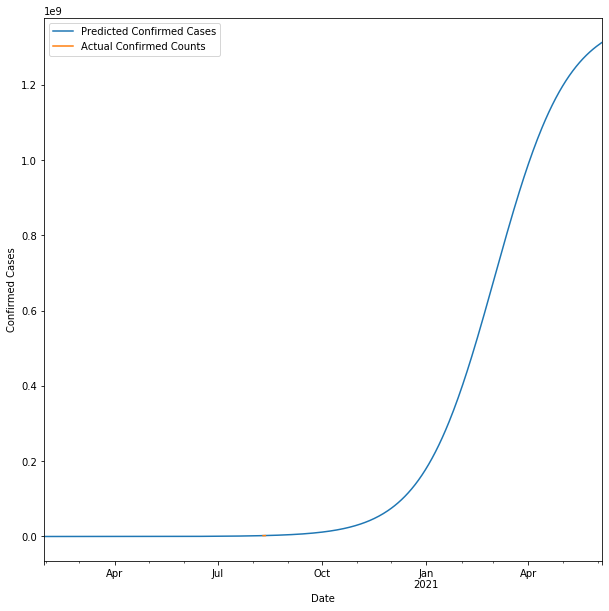

In [120]:
from fbprophet import Prophet
model_india = Prophet(growth="logistic",changepoint_prior_scale=0.4,changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18','2020-07-08','2020-07-28'])
pop = 1380004385 #from worldometers
train['cap'] = pop
model_india.fit(train)
# Future Prediction
future_dates = model_india.make_future_dataframe(periods=300)
future_dates['cap'] = pop
forecast =  model_india.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Cases',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Confirmed Cases");

### Forecast Model

In [121]:
forecast.iloc[170:200]

ds         trend         cap    yhat_lower    yhat_upper  \
170 2020-07-18  1.082483e+06  1380004385  1.077150e+06  1.089451e+06   
171 2020-07-19  1.120598e+06  1380004385  1.115297e+06  1.127228e+06   
172 2020-07-20  1.160054e+06  1380004385  1.154095e+06  1.166252e+06   
173 2020-07-21  1.200898e+06  1380004385  1.192531e+06  1.205308e+06   
174 2020-07-22  1.243178e+06  1380004385  1.236695e+06  1.248790e+06   
175 2020-07-23  1.286946e+06  1380004385  1.280737e+06  1.292887e+06   
176 2020-07-24  1.332254e+06  1380004385  1.326636e+06  1.338904e+06   
177 2020-07-25  1.379154e+06  1380004385  1.373473e+06  1.386072e+06   
178 2020-07-26  1.427705e+06  1380004385  1.422517e+06  1.434746e+06   
179 2020-07-27  1.477962e+06  1380004385  1.471749e+06  1.484479e+06   
180 2020-07-28  1.529987e+06  1380004385  1.521368e+06  1.534111e+06   
181 2020-07-29  1.578602e+06  1380004385  1.571822e+06  1.584181e+06   
182 2020-07-30  1.628760e+06  1380004385  1.622932e+06  1.635353e+06   
183 2020-07-31  1.680509e+06  1380004385  1.674527e+06  1.687324e+06   
184 2020-08-01  1.733901e+06  1380004385  1.728601e+06  1.740340e+06   
185 2020-08-02  1.788987e+06  1380004385  1.783708e+06  1.796308e+06   
186 2020-08-03  1.845821e+06  1380004385  1.840171e+06  1.852315e+06   
187 2020-08-04  1.904458e+06  1380004385  1.895871e+06  1.908485e+06   
188 2020-08-05  1.964954e+06  1380004385  1.958646e+06  1.970652e+06   
189 2020-08-06  2.027370e+06  1380004385  2.021585e+06  2.033395e+06   
190 2020-08-07  2.091765e+06  1380004385  2.085867e+06  2.098221e+06   
191 2020-08-08  2.158203e+06  1380004385  2.152780e+06  2.165079e+06   
192 2020-08-09  2.226747e+06  1380004385  2.221337e+06  2.233884e+06   
193 2020-08-10  2.297465e+06  1380004385  2.291888e+06  2.304246e+06   
194 2020-08-11  2.370424e+06  1380004385  2.361559e+06  2.374999e+06   
195 2020-08-12  2.445697e+06  1380004385  2.437903e+06  2.452824e+06   
196 2020-08-13  2.523355e+06  1380004385  2.515604e+06  2.531342e+06   
197 2020-08-14  2.603475e+06  1380004385  2.594921e+06  2.613087e+06   
198 2020-08-15  2.686133e+06  1380004385  2.677043e+06  2.697470e+06   
199 2020-08-16  2.771411e+06  1380004385  2.760435e+06  2.789287e+06   

      trend_lower   trend_upper  additive_terms  additive_terms_lower  \
170  1.082483e+06  1.082483e+06      795.368428            795.368428   
171  1.120598e+06  1.120598e+06      699.231426            699.231426   
172  1.160054e+06  1.160054e+06      372.475883            372.475883   
173  1.200898e+06  1.200898e+06    -2064.170604          -2064.170604   
174  1.243178e+06  1.243178e+06     -286.300918           -286.300918   
175  1.286946e+06  1.286946e+06       21.520760             21.520760   
176  1.332254e+06  1.332254e+06      461.875024            461.875024   
177  1.379154e+06  1.379154e+06      795.368428            795.368428   
178  1.427705e+06  1.427705e+06      699.231426            699.231426   
179  1.477962e+06  1.477962e+06      372.475883            372.475883   
180  1.529987e+06  1.529987e+06    -2064.170604          -2064.170604   
181  1.578602e+06  1.578602e+06     -286.300918           -286.300918   
182  1.628760e+06  1.628760e+06       21.520760             21.520760   
183  1.680509e+06  1.680509e+06      461.875024            461.875024   
184  1.733901e+06  1.733901e+06      795.368428            795.368428   
185  1.788987e+06  1.788987e+06      699.231426            699.231426   
186  1.845821e+06  1.845821e+06      372.475883            372.475883   
187  1.904458e+06  1.904458e+06    -2064.170604          -2064.170604   
188  1.964954e+06  1.964954e+06     -286.300918           -286.300918   
189  2.027370e+06  2.027370e+06       21.520760             21.520760   
190  2.091765e+06  2.091765e+06      461.875024            461.875024   
191  2.158203e+06  2.158203e+06      795.368428            795.368428   
192  2.226747e+06  2.226747e+06      699.231426            699.231426   
193  2.297465e+06  2.297465

## Predicting the condition in the upcoming 25 days : ARIMA Model

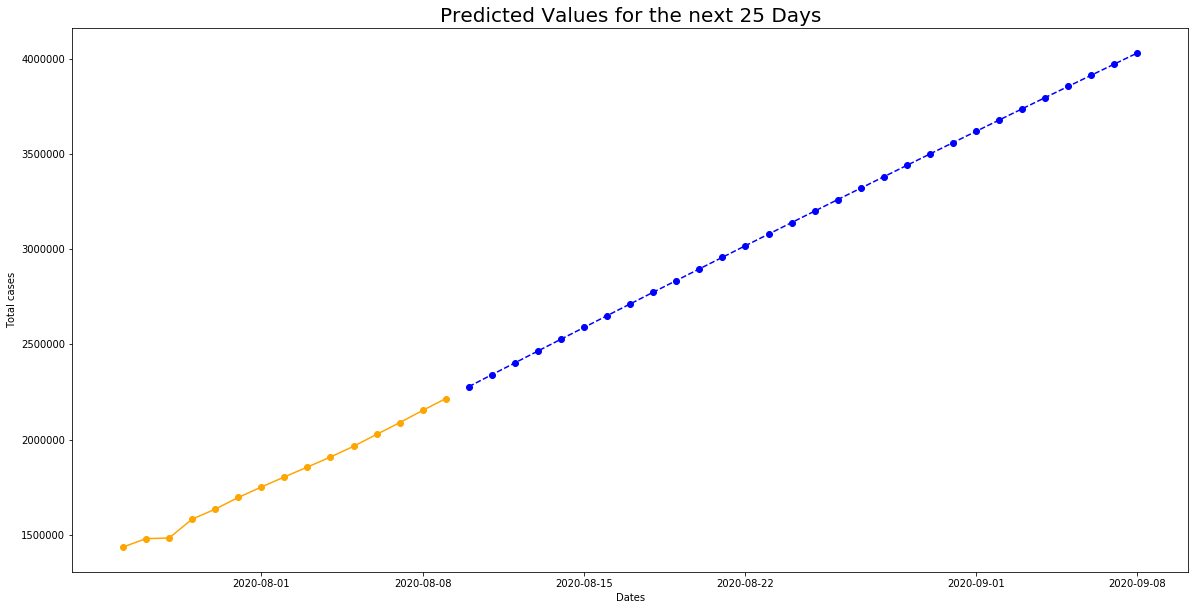

In [122]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 25 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

### Predicted Dataset for the upcoming 25 days : ARIMA Model

In [123]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)
arima_df.tail(30)

Date     Predicted
0  2020-08-10  2.277763e+06
1  2020-08-11  2.340436e+06
2  2020-08-12  2.402552e+06
3  2020-08-13  2.464820e+06
4  2020-08-14  2.526825e+06
5  2020-08-15  2.588665e+06
6  2020-08-16  2.650410e+06
7  2020-08-17  2.711963e+06
8  2020-08-18  2.773384e+06
9  2020-08-19  2.834658e+06
10 2020-08-20  2.895776e+06
11 2020-08-21  2.956753e+06
12 2020-08-22  3.017579e+06
13 2020-08-23  3.078258e+06
14 2020-08-24  3.138791e+06
15 2020-08-25  3.199177e+06
16 2020-08-26  3.259417e+06
17 2020-08-27  3.319511e+06
18 2020-08-28  3.379460e+06
19 2020-08-29  3.439264e+06
20 2020-08-30  3.498923e+06
21 2020-08-31  3.558438e+06
22 2020-09-01  3.617809e+06
23 2020-09-02  3.677036e+06
24 2020-09-03  3.736120e+06
25 2020-09-04  3.795061e+06
26 2020-09-05  3.853860e+06
27 2020-09-06  3.912516e+06
28 2020-09-07  3.971030e+06
29 2020-09-08  4.029402e+06

In [124]:
test=test.reset_index()

In [125]:
df1=pd.DataFrame(forecast[0],columns=['yhat'])
df2=pd.DataFrame(prediction_dates,columns=['ds'])
df3=test['y']
df4=pd.merge(df2,df3,right_index=True,left_index=True)
df5=pd.merge(df4,df1,right_index=True,left_index=True)

In [126]:
df5['mse'],df5['rmse'],df5['mae'],df5['mape'],df5['mdape']=[0,0,0,0,0]

In [127]:
for t in range(len(test)):
    mape =  np.mean(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mape'][t]="{:.5f}".format(mape)
    mdape =  np.median(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mdape'][t]="{:.5f}".format(mdape)
    mae = np.mean(np.abs(df5['yhat'][t] - df5['y'][t]))
    df5['mae'][t]=mae
    mse = np.mean((df5['yhat'][t] - df5['y'][t])**2)
    df5['mse'][t]=mse
    rmse = np.mean((df5['yhat'][t] - df5['y'][t])**2)**.5
    df5['rmse'][t]=rmse

In [128]:
df5

ds        y          yhat        mse   rmse    mae     mape    mdape
0 2020-08-10  2268675  2.277763e+06   82598268   9088   9088  0.00401  0.00401
1 2020-08-11  2329638  2.340436e+06  116599027  10798  10798  0.00464  0.00464
2 2020-08-12  2396637  2.402552e+06   34988310   5915   5915  0.00247  0.00247

In [129]:
num_plot_india['Active']=0
for i in range(len(num_plot_india)):
    num_plot_india['Active'][i]=num_plot_india['Confirmed'][i]-num_plot_india['Recovered'][i]-num_plot_india['Deaths'][i]
num_plot_india

date  Confirmed  Recovered  Deaths  Confirmed Case Increase  \
0   2020-01-30          1          0       0                        0   
1   2020-01-31          1          0       0                        0   
2   2020-02-01          1          0       0                        0   
3   2020-02-02          2          0       0                        1   
4   2020-02-03          3          0       0                        1   
..         ...        ...        ...     ...                      ...   
191 2020-08-08    2153010    1480884   43379                    64399   
192 2020-08-09    2215074    1535743   44386                    62064   
193 2020-08-10    2268675    1583489   45257                    53601   
194 2020-08-11    2329638    1639599   46091                    60963   
195 2020-08-12    2396637    1695982   47033                    66999   

     Death Case Increase  Active  
0                      0       1  
1                      0       1  
2                      0       1  
3                      0       2  
4                      0       3  
..                   ...     ...  
191                  861  628747  
192                 1007  634945  
193                  871  639929  
194                  834  643948  
195                  942  653622  

[196 rows x 7 columns]

## Requirement of Hospital Beds v/s Confirmed Cases

In [130]:
train_bed=pd.DataFrame(columns=['ds','y'])
test_bed=pd.DataFrame(columns=['ds','y'])
train_bed_y= num_plot_india.iloc[:-3,-1:]
train_bed_ds = num_plot_india.iloc[:-3,:1]
train_bed=pd.merge(train_bed_ds,train_bed_y,right_index=True,left_index=True)
train_bed.rename(columns={'date': 'ds', 'Active': 'y'}, inplace=True)
test_bed_y = num_plot_india.iloc[-3:,-1:]
test_bed_ds = num_plot_india.iloc[-3:,:1]
test_bed=pd.merge(test_bed_ds,test_bed_y,right_index=True,left_index=True)
test_bed.rename(columns={'date': 'ds', 'Active': 'y'}, inplace=True)

In [131]:
test_bed = test_bed.set_index("ds")
test_bed = test_bed['y']

**Considering current number of active cases, between mid May and October we will see a drastic increase in the number of active cases and by end January all the available hospital beds in India will be occupied
if we donot lower the increase of cases or increase the number of beds**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


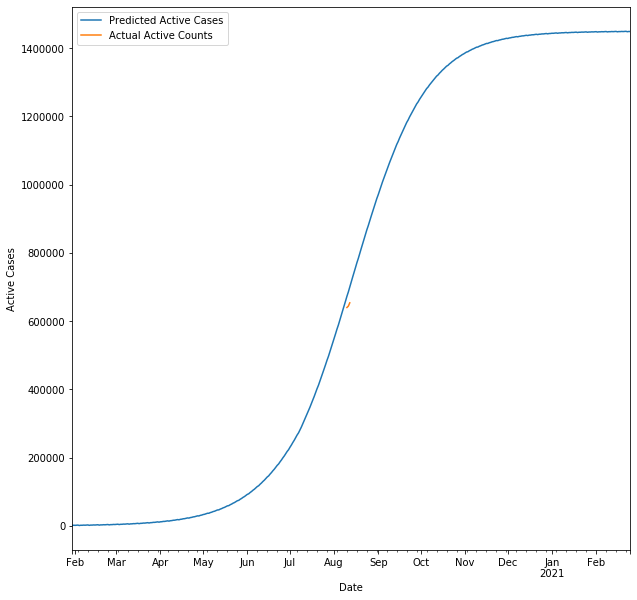

In [132]:
num_bed=hospital_beds.iloc[36][7]+hospital_beds.iloc[36][9]+hospital_beds.iloc[36][11]
model_bed = Prophet(growth = "logistic",changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18','2020-07-08','2020-07-28'])
bed_cap = num_bed 
train_bed['cap'] = bed_cap
model_bed.fit(train_bed)
# Future Prediction
future_dates = model_bed.make_future_dataframe(periods=200)
future_dates['cap'] = bed_cap
forecast =  model_bed.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Active Cases',legend=True,figsize=(10,10))
test_bed.plot(y='y',label='Actual Active Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Active Cases");

### Predicted Forecast

In [133]:
forecast.iloc[230:250]

ds         trend      cap    yhat_lower    yhat_upper  \
230 2020-09-16  1.136932e+06  1449785  1.123841e+06  1.149755e+06   
231 2020-09-17  1.146348e+06  1449785  1.133414e+06  1.159906e+06   
232 2020-09-18  1.155553e+06  1449785  1.143450e+06  1.168281e+06   
233 2020-09-19  1.164549e+06  1449785  1.152411e+06  1.176662e+06   
234 2020-09-20  1.173335e+06  1449785  1.161604e+06  1.186447e+06   
235 2020-09-21  1.181913e+06  1449785  1.170141e+06  1.195715e+06   
236 2020-09-22  1.190284e+06  1449785  1.177593e+06  1.202489e+06   
237 2020-09-23  1.198448e+06  1449785  1.185559e+06  1.210996e+06   
238 2020-09-24  1.206409e+06  1449785  1.193142e+06  1.219327e+06   
239 2020-09-25  1.214167e+06  1449785  1.201937e+06  1.227730e+06   
240 2020-09-26  1.221724e+06  1449785  1.208868e+06  1.234067e+06   
241 2020-09-27  1.229083e+06  1449785  1.216471e+06  1.241869e+06   
242 2020-09-28  1.236246e+06  1449785  1.224391e+06  1.249477e+06   
243 2020-09-29  1.243215e+06  1449785  1.229819e+06  1.255258e+06   
244 2020-09-30  1.249994e+06  1449785  1.237250e+06  1.264063e+06   
245 2020-10-01  1.256585e+06  1449785  1.244170e+06  1.269343e+06   
246 2020-10-02  1.262991e+06  1449785  1.250618e+06  1.276325e+06   
247 2020-10-03  1.269215e+06  1449785  1.256232e+06  1.282054e+06   
248 2020-10-04  1.275261e+06  1449785  1.263367e+06  1.288135e+06   
249 2020-10-05  1.281131e+06  1449785  1.268978e+06  1.293862e+06   

      trend_lower   trend_upper  additive_terms  additive_terms_lower  \
230  1.131943e+06  1.142969e+06      -12.015579            -12.015579   
231  1.141280e+06  1.152540e+06     -186.834277           -186.834277   
232  1.150356e+06  1.161908e+06      272.862380            272.862380   
233  1.159231e+06  1.171010e+06     -118.941940           -118.941940   
234  1.167913e+06  1.179890e+06      201.617919            201.617919   
235  1.176366e+06  1.188523e+06      541.464084            541.464084   
236  1.184665e+06  1.196895e+06     -698.152587           -698.152587   
237  1.192757e+06  1.205061e+06      -12.015579            -12.015579   
238  1.200666e+06  1.213172e+06     -186.834277           -186.834277   
239  1.208405e+06  1.220924e+06      272.862380            272.862380   
240  1.215899e+06  1.228466e+06     -118.941940           -118.941940   
241  1.223194e+06  1.235825e+06      201.617919            201.617919   
242  1.230376e+06  1.242938e+06      541.464084            541.464084   
243  1.237371e+06  1.249875e+06     -698.152587           -698.152587   
244  1.244167e+06  1.256681e+06      -12.015579            -12.015579   
245  1.250632e+06  1.263274e+06     -186.834277           -186.834277   
246  1.257052e+06  1.269744e+06      272.862380            272.862380   
247  1.263244e+06  1.275962e+06     -118.941940           -118.941940   
248  1.269297e+06  1.281962e+06      201.617919            201.617919   
249  1.275211e+06  1.287789e+06      541.464084            541.464084   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
230            -12.015579  -12.015579    -12.015579    -12.015579   
231           -186.834277 -186.834277   -186.834277   -186.834277   
232            272.862380  272.862380    272.862380    272.862380   
233           -118.941940 -118.941940   -118.941940   -118.941940   
234            201.617919  201.617919    201.617919    201.617919   
235            541.464084  541.464084    541.464084    541.464084   
236           -698.152587 -698.152587   -698.152587   -698.152587   
237            -12.015579  -12.015579    -12.015579    -12.015579   
238           -186.834277 -186.834277   -186.834277   -186.834277   
239            272.862380  272.862380    272.862380    272.862380   
240           -118.941940 -118.941940   -118.941940   -118.941940   
241            201.617919  201.617919    201.617919    201.617919   
242            541.464084  541.464084    541.464084    541.464084   
243           -698.152587 -698.152587   -698.152587   -698.152

## When Individual States will run out of beds? Let's see...

In [134]:
hospital_beds_active=hospital_beds
hospital_beds_active['Total_Beds']=0

In [135]:
for i in range(len(hospital_beds_active)):
    hospital_beds_active['Total_Beds'][i]=hospital_beds.iloc[i][7]+hospital_beds.iloc[i][9]+hospital_beds.iloc[i][11]

## Hospital Beds v/s Active Cases - State-wise Analysis

In [136]:
india_covid_19['Active'] = india_covid_19['Confirmed'] - india_covid_19['Deaths']- india_covid_19['Recovered']
india_state_cases=pd.DataFrame()
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],errors='coerce')
states =list(india_covid_19['State'].unique())
for state in states:
    mah_cases_complete=india_covid_19.loc[india_covid_19['State']==state]
    mah_cases_complete['Date'] = mah_cases_complete['Date'].dt.strftime("%Y-%m-%d")
    mah_cases_complete['Date']=pd.to_datetime(mah_cases_complete['Date'])
    mah_cases_complete = mah_cases_complete[(pd.Timestamp(datetime.date(2020,3,21)) < mah_cases_complete['Date']) & ( mah_cases_complete['Date']< pd.Timestamp(datetime.date(2020,8,12)))]
    india_state_cases=india_state_cases.append(mah_cases_complete)

india_state_cases.sample(10)

Unnamed: 0   Sno       Date     Time                        State  \
4595        4595  4596 2020-07-28  8:00 AM                   Tamil Nadu   
327          327   328 2020-03-24  6:00 PM                      Manipur   
2955        2955  2956 2020-06-13  8:00 AM  Andaman and Nicobar Islands   
3113        3113  3114 2020-06-17  8:00 AM                    Jharkhand   
3010        3010  3011 2020-06-14  8:00 AM                  Maharashtra   
3506        3506  3507 2020-06-28  8:00 AM                      Haryana   
3071        3071  3072 2020-06-16  8:00 AM                        Delhi   
4581        4581  4582 2020-07-28  8:00 AM                    Karnataka   
2094        2094  2095 2020-05-19  8:00 AM                   Tamil Nadu   
2653        2653  2654 2020-04-06  8:00 AM                     Nagaland   

     ConfirmedIndianNational ConfirmedForeignNational  Recovered  Deaths  \
4595                       -                        -     162249    3571   
327                        1                        0          0       0   
2955                       -                        -         33       0   
3113                       -                        -       1121       9   
3010                       -                        -      49346    3830   
3506                       -                        -       8472     218   
3071                       -                        -      16427    1400   
4581                       -                        -      37685    1953   
2094                       -                        -       4406      81   
2653                       -                        -          0       0   

      Confirmed  Active  
4595     220716   54896  
327           1       1  
2955         38       5  
3113       1839     709  
3010     104568   51392  
3506      13427    4737  
3071      42829   25002  
4581     101465   61827  
2094      11760    7273  
2653         58      58

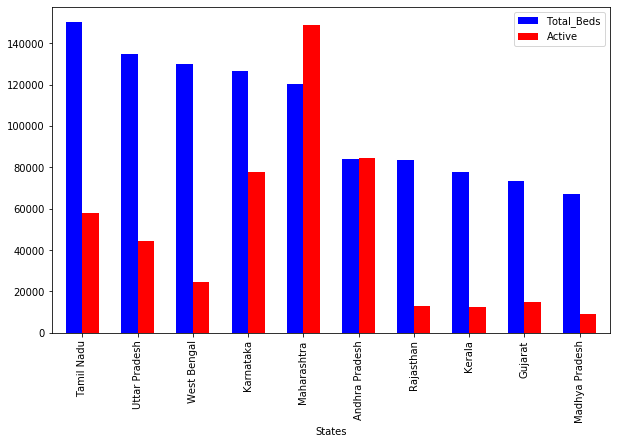

In [137]:
for state in states:
    beds_vs_active=india_state_cases.loc[india_state_cases['State']==state]
    active=india_state_cases.groupby(['State'])['Active'].max()
    beds=hospital_beds_active.groupby(['State/UT'])['Total_Beds'].max()
    beds_vs_active=pd.merge(active,beds,right_index=True,left_index=True)
beds_vs_active=beds_vs_active.reset_index()
bva=beds_vs_active[['Total_Beds','Active','index']].groupby('index').max().sort_values('Total_Beds',ascending=False).head(10)
bva.plot(kind='bar',width=0.6,colormap='bwr',figsize=(10,6))
plt.xlabel('States')
plt.show()

### The state of Maharashtra is facing lacking of beds in this time period

### Since Maharashtra has highest number of cases we are predicting for the bed availability here

In [138]:
num_bed_mah=hospital_beds_active.loc[hospital_beds_active['State/UT']=='Maharashtra']['Total_Beds']
num_bed_mah=num_bed_mah.iloc[0]
num_mah=india_state_cases.loc[india_state_cases['State']=='Maharashtra'][['Date','Active']]
train_bed_mah=pd.DataFrame(columns=['ds','y'])
test_bed_mah=pd.DataFrame(columns=['ds','y'])
train_bed_mah_y= num_mah.iloc[:-3,-1:]
train_bed_mah_ds = num_mah.iloc[:-3,:1]
train_bed_mah=pd.merge(train_bed_mah_ds,train_bed_mah_y,right_index=True,left_index=True)
train_bed_mah.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)
test_bed_mah_y = num_mah.iloc[-3:,-1:]
test_bed_mah_ds = num_mah.iloc[-3:,:1]
test_bed_mah=pd.merge(test_bed_mah_ds,test_bed_mah_y,right_index=True,left_index=True)
test_bed_mah.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)

In [139]:
test_bed_mah = test_bed_mah.set_index("ds")
test_bed_mah = test_bed_mah['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


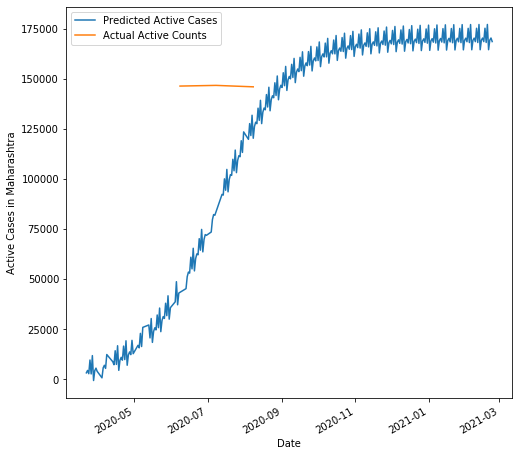

In [140]:
model_bed_mah = Prophet(growth = "logistic",changepoints=['2020-04-14','2020-04-21','2020-04-30','2020-05-13','2020-05-27','2020-06-30','2020-07-26'])
bed_cap = num_bed_mah + 50000
train_bed_mah['cap'] = bed_cap
model_bed_mah.fit(train_bed_mah)
# Future Prediction
future_dates = model_bed_mah.make_future_dataframe(periods=200)
future_dates['cap'] = bed_cap
forecast_mah =  model_bed_mah.predict(future_dates)
# Plotting
ax = forecast_mah.plot(x='ds',y='yhat',label='Predicted Active Cases',legend=True,figsize=(8,8))
test_bed_mah.plot(y='y',label='Actual Active Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Active Cases in Maharashtra");


**As per logistic growth,Maharashtra was expected to reach the bed capacity in the first week of August, however there has been rapid growth in cases and the bed capacity was reached in last week of July itself.
We are now checking if 50k beds are added in Maharashtra when will that capacity be reached**

### Condition for West Bengal in case of running out of beds

In [141]:
num_bed_wb=hospital_beds_active.loc[hospital_beds_active['State/UT']=='West Bengal']['Total_Beds']
num_bed_wb=num_bed_wb.iloc[0]
num_wb=india_state_cases.loc[india_state_cases['State']=='West Bengal'][['Date','Active']]
train_bed_wb=pd.DataFrame(columns=['ds','y'])
test_bed_wb=pd.DataFrame(columns=['ds','y'])
train_bed_wb_y= num_wb.iloc[:-3,-1:]
train_bed_wb_ds = num_wb.iloc[:-3,:1]
train_bed_wb=pd.merge(train_bed_wb_ds,train_bed_wb_y,right_index=True,left_index=True)
train_bed_wb.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)
test_bed_wb_y = num_wb.iloc[-3:,-1:]
test_bed_wb_ds = num_wb.iloc[-3:,:1]
test_bed_wb=pd.merge(test_bed_wb_ds,test_bed_wb_y,right_index=True,left_index=True)
test_bed_wb.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)

In [142]:
test_bed_wb = test_bed_wb.set_index("ds")
test_bed_wb = test_bed_wb['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


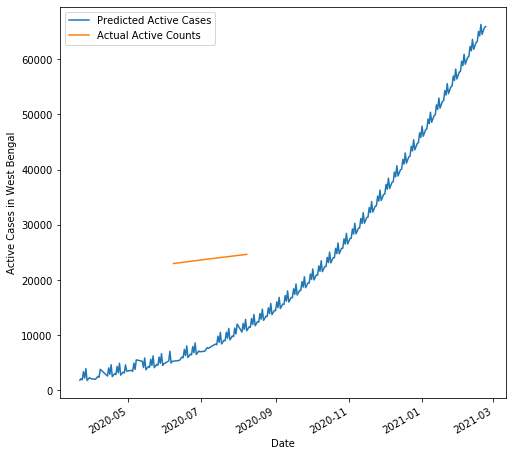

In [143]:
model_bed_wb = Prophet(growth = "logistic",changepoints=['2020-04-14','2020-04-21','2020-04-30','2020-05-13','2020-05-27','2020-06-30','2020-07-26'])
bed_cap = num_bed_wb + 0
train_bed_wb['cap'] = bed_cap
model_bed_wb.fit(train_bed_wb)
# Future Prediction
future_dates = model_bed_wb.make_future_dataframe(periods=200)
future_dates['cap'] = bed_cap
forecast_wb =  model_bed_wb.predict(future_dates)
# Plotting
ax = forecast_wb.plot(x='ds',y='yhat',label='Predicted Active Cases',legend=True,figsize=(8,8))
test_bed_wb.plot(y='y',label='Actual Active Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Active Cases in West Bengal");

**For West Bengal, the shortage of beds will be occuring in the month of March, 2021 (as a whole state). But in some districts of West Bengal the condition is getting worser and worser and the hospitals are running out of beds. We have to increase the limit of the beds to overcome this challange**

# Conclusion :

**For the countries like India, USA, Brazil, they are the worst candidates of this pandemic, and the had suffered the most and still sufferring. If we have to fought against the virus, we have test the samples in a huge number. Testing is the only without lockdown the country, as Japan is doing. Testing is the most essential thing, without which we cannot trace the curve and it will increase with a high slope.**

**According to the prediction, India will be seeing the flattened curve of daily confirmed cases in the month of March and April, 2021. And at that moment the country will have all total 50000000 confirmed cases, which will be the nightmare for the country. If the vaccine is available then it will be another thing, but if the confirmed cases are increasing at the rate of 60k to 70k, and eventually it will increase to 90k to 100k, 1/3 of the total population of India will be effected**

### Stay Home! Stay Safe!

### Thank You!